# Mod 4 Project - Starter Notebook

This notebook has been provided to you so that you can make use of the following starter code to help with the trickier parts of preprocessing the Zillow dataset. 

The notebook contains a rough outline the general order you'll likely want to take in this project. You'll notice that most of the areas are left blank. This is so that it's more obvious exactly when you should make use of the starter code provided for preprocessing. 

**_NOTE:_** The number of empty cells are not meant to infer how much or how little code should be involved in any given step--we've just provided a few for your convenience. Add, delete, and change things around in this notebook as needed!

# Some Notes Before Starting

This project will be one of the more challenging projects you complete in this program. This is because working with Time Series data is a bit different than working with regular datasets. In order to make this a bit less frustrating and help you understand what you need to do (and when you need to do it), we'll quickly review the dataset formats that you'll encounter in this project. 

## Wide Format vs Long Format

If you take a look at the format of the data in `zillow_data.csv`, you'll notice that the actual Time Series values are stored as separate columns. Here's a sample: 

<img src='https://raw.githubusercontent.com/learn-co-students/dsc-mod-4-project-seattle-ds-102819/master/images/df_head.png'>

You'll notice that the first seven columns look like any other dataset you're used to working with. However, column 8 refers to the median housing sales values for April 1996, column 9 for May 1996, and so on. This This is called **_Wide Format_**, and it makes the dataframe intuitive and easy to read. However, there are problems with this format when it comes to actually learning from the data, because the data only makes sense if you know the name of the column that the data can be found it. Since column names are metadata, our algorithms will miss out on what dates each value is for. This means that before we pass this data to our ARIMA model, we'll need to reshape our dataset to **_Long Format_**. Reshaped into long format, the dataframe above would now look like:

<img src='https://raw.githubusercontent.com/learn-co-students/dsc-mod-4-project-seattle-ds-102819/master/images/melted1.png'>

There are now many more rows in this dataset--one for each unique time and zipcode combination in the data! Once our dataset is in this format, we'll be able to train an ARIMA model on it. The method used to convert from Wide to Long is `pd.melt()`, and it is common to refer to our dataset as 'melted' after the transition to denote that it is in long format. 

# Helper Functions Provided

Melting a dataset can be tricky if you've never done it before, so you'll see that we have provided a sample function, `melt_data()`, to help you with this step below. Also provided is:

* `get_datetimes()`, a function to deal with converting the column values for datetimes as a pandas series of datetime objects
* Some good parameters for matplotlib to help make your visualizations more readable. 

Good luck!


# Load the Data/Filtering for Chosen Zipcodes

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

df = pd.read_csv('zillow_data.csv')
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [3]:
#Selecting data from Austin
df_atx = df[df['City'] == 'Austin']

In [5]:
#Select Austin Texas
df_atx = df_atx[df_atx['State'] == 'TX']

In [4]:
df_atx.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
66,92617,78704,Austin,TX,Austin,Travis,67,221300.0,221100.0,221000.0,...,530100,532400,534200,536200,538200,539800,540200,542300,547100,550900
98,92654,78745,Austin,TX,Austin,Travis,99,135000.0,134200.0,133800.0,...,286300,286900,287500,288700,289800,290500,291300,292600,294000,294700
422,92667,78758,Austin,TX,Austin,Travis,423,129000.0,128300.0,127500.0,...,250000,248400,247500,247400,247900,250500,255100,260100,266000,270400
432,92651,78741,Austin,TX,Austin,Travis,433,93800.0,93600.0,93500.0,...,228000,226700,227600,230200,234100,238300,241000,243600,247400,250400
502,92662,78753,Austin,TX,Austin,Travis,503,111300.0,110600.0,109900.0,...,222600,223200,223600,223100,223100,225000,227100,228700,231500,233400


In [30]:
df_atx

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
66,92617,78704,Austin,TX,Austin,Travis,67,221300.0,221100.0,221000.0,...,530100,532400,534200,536200,538200,539800,540200,542300,547100,550900
98,92654,78745,Austin,TX,Austin,Travis,99,135000.0,134200.0,133800.0,...,286300,286900,287500,288700,289800,290500,291300,292600,294000,294700
422,92667,78758,Austin,TX,Austin,Travis,423,129000.0,128300.0,127500.0,...,250000,248400,247500,247400,247900,250500,255100,260100,266000,270400
432,92651,78741,Austin,TX,Austin,Travis,433,93800.0,93600.0,93500.0,...,228000,226700,227600,230200,234100,238300,241000,243600,247400,250400
502,92662,78753,Austin,TX,Austin,Travis,503,111300.0,110600.0,109900.0,...,222600,223200,223600,223100,223100,225000,227100,228700,231500,233400
507,92668,78759,Austin,TX,Austin,Travis,508,266400.0,269000.0,272000.0,...,429700,431100,433000,435800,439400,442400,443200,445000,449900,454100
594,92657,78748,Austin,TX,Austin,Travis,595,199500.0,198800.0,197900.0,...,268400,268700,270100,272600,274900,276700,277800,279000,280800,282000
1671,92653,78744,Austin,TX,Austin,Travis,1672,85400.0,85400.0,85300.0,...,180300,182900,186000,188400,189700,190900,192100,193200,194500,195500
1936,92658,78749,Austin,TX,Austin,Travis,1937,264000.0,266400.0,269300.0,...,350900,350400,349400,348900,348700,348900,349700,352100,355500,357700
2462,92634,78723,Austin,TX,Austin,Travis,2463,97600.0,99000.0,100300.0,...,336300,339000,340500,343100,347800,352500,355800,358700,361900,364200


# Data Preprocessing

In [6]:
def get_datetimes(df):
    return pd.to_datetime(df.columns.values[7:], format='%Y-%m')

In [7]:
get_datetimes(df_atx)

DatetimeIndex(['1996-04-01', '1996-05-01', '1996-06-01', '1996-07-01',
               '1996-08-01', '1996-09-01', '1996-10-01', '1996-11-01',
               '1996-12-01', '1997-01-01',
               ...
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01',
               '2018-03-01', '2018-04-01'],
              dtype='datetime64[ns]', length=265, freq=None)

In [8]:
df_atx.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
66,92617,78704,Austin,TX,Austin,Travis,67,221300.0,221100.0,221000.0,...,530100,532400,534200,536200,538200,539800,540200,542300,547100,550900
98,92654,78745,Austin,TX,Austin,Travis,99,135000.0,134200.0,133800.0,...,286300,286900,287500,288700,289800,290500,291300,292600,294000,294700
422,92667,78758,Austin,TX,Austin,Travis,423,129000.0,128300.0,127500.0,...,250000,248400,247500,247400,247900,250500,255100,260100,266000,270400
432,92651,78741,Austin,TX,Austin,Travis,433,93800.0,93600.0,93500.0,...,228000,226700,227600,230200,234100,238300,241000,243600,247400,250400
502,92662,78753,Austin,TX,Austin,Travis,503,111300.0,110600.0,109900.0,...,222600,223200,223600,223100,223100,225000,227100,228700,231500,233400


# Reshape from Wide to Long Format

In [9]:
def melt_data(df):
    melted = pd.melt(df, id_vars=['RegionID','RegionName', 'City', 'State', 'Metro',
                                  'CountyName', 'SizeRank'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})

In [10]:
df_atx_melt = melt_data(df_atx)

In [11]:
df_atx_melt.head()

,value
time,
1996-04-01,217871.052632
1996-05-01,217673.684211
1996-06-01,217610.526316
1996-07-01,217657.894737
1996-08-01,217792.105263


In [12]:
df_atx_melt

,value
time,
1996-04-01,217871.052632
1996-05-01,217673.684211
1996-06-01,217610.526316
1996-07-01,217657.894737
1996-08-01,217792.105263
...,...
2017-12-01,393878.947368
2018-01-01,395323.684211
2018-02-01,397786.842105


# Visualization

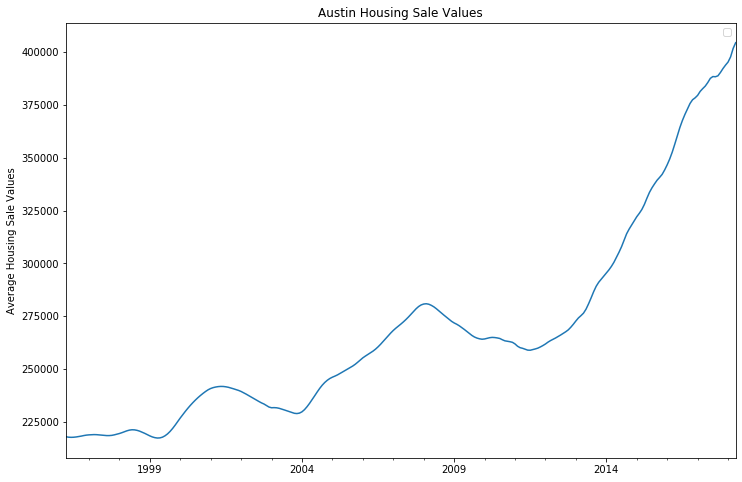

In [13]:
df_atx_melt.plot(figsize = (12,8))
plt.title('Austin Housing Sale Values')
plt.legend('')
plt.xlabel('')
plt.ylabel('Average Housing Sale Values')
plt.show()

# Isolating Zip Code

In [14]:
def melt_zip(zipcode):
    df_atx_zip = melt_data(df_atx[df_atx['RegionName'] == zipcode])
    return df_atx_zip

In [15]:
melt_zip(78704)

,value
time,
1996-04-01,221300.0
1996-05-01,221100.0
1996-06-01,221000.0
1996-07-01,221000.0
1996-08-01,221300.0
...,...
2017-12-01,539800.0
2018-01-01,540200.0
2018-02-01,542300.0


# ARIMA Modeling

## 78704 - 7.6206% predicted return  

In [16]:
import warnings
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    error = mean_squared_error(test, predictions)
    return error

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

In [17]:
# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")


evaluate_models(melt_zip(78704).value, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=14336008453.453
ARIMA(0, 0, 1) MSE=3632585803.872
ARIMA(0, 1, 0) MSE=4325690.708
ARIMA(0, 1, 1) MSE=1486849.133
ARIMA(0, 2, 0) MSE=1410454.769
ARIMA(0, 2, 1) MSE=952971.651
ARIMA(1, 0, 0) MSE=7570268.584
ARIMA(1, 1, 0) MSE=1357996.246
ARIMA(1, 1, 2) MSE=887253.591
ARIMA(1, 2, 0) MSE=1385206.154
ARIMA(1, 2, 1) MSE=1035708.478
ARIMA(1, 2, 2) MSE=919148.698
ARIMA(2, 0, 0) MSE=1435434.448
ARIMA(2, 1, 0) MSE=1266259.720
ARIMA(2, 1, 1) MSE=975840.710
ARIMA(2, 1, 2) MSE=846500.608
ARIMA(2, 2, 0) MSE=1079262.285
ARIMA(2, 2, 1) MSE=972260.874
ARIMA(4, 0, 0) MSE=1112066.846
ARIMA(4, 2, 0) MSE=971437.826
ARIMA(6, 0, 0) MSE=958128.734
ARIMA(6, 1, 1) MSE=969098.192
ARIMA(6, 2, 0) MSE=992349.479
ARIMA(6, 2, 1) MSE=994433.619
ARIMA(8, 0, 0) MSE=989539.778
ARIMA(8, 1, 1) MSE=981599.962
ARIMA(8, 2, 0) MSE=951865.139
ARIMA(8, 2, 1) MSE=947411.122
Best ARIMA(2, 1, 2) MSE=846500.608


# Interpreting Results

In [18]:
def interpret_model(zipcode, p, d, q):

    # make forecast 
    model = ARIMA(melt_zip(zipcode), order=(p,d,q))
    model_fit = model.fit(disp=0)

    forecast = model_fit.forecast(36)

    actual_foreacst = forecast[0]
    forecast_conf_int = forecast[2]

    # make dataframe with forecast and 95% confidence interval 
    df_forecast = pd.DataFrame({'time': pd.date_range(start = '2018-05-01', end = '2021-04-01', freq = 'MS')})
    df_forecast['forecast'] = actual_foreacst
    df_forecast['lower_bound'] = forecast_conf_int[:, 0]
    df_forecast['upper_bound'] = forecast_conf_int[:, 1]
    df_forecast.set_index('time', inplace = True)

    # combine raw data dataframe and forecast dataframe
    df_new = pd.concat([melt_zip(zipcode), df_forecast])


    fig = plt.figure(figsize = (12, 8))

    plt.plot(df_new['value'], label = 'raw data')
    plt.plot(df_new['forecast'], label = 'forecast')
    plt.fill_between(df_new.index, df_new['lower_bound'], df_new['upper_bound'], color="k", alpha=.15,
                label = 'confidence interval')
    plt.legend(loc = 'upper left')
    plt.title('Forecast for %s' % zipcode)
    
    # forecasted price after 3 years
    forcast_3_years = df_new.loc['2021-04-01', 'forecast']
    forcast_lower = df_new.loc['2021-04-01', 'lower_bound']
    forcast_upper = df_new.loc['2021-04-01', 'upper_bound']
    
    last_price = melt_zip(zipcode).loc['2018-04-01', 'value']
    
    predicted_percent_change = (forcast_3_years - last_price) / last_price
    print(f' I would expect a {np.round(predicted_percent_change * 100, 4)}% return on my investment in {zipcode}')

 I would expect a 7.6206% return on my investment in 78704


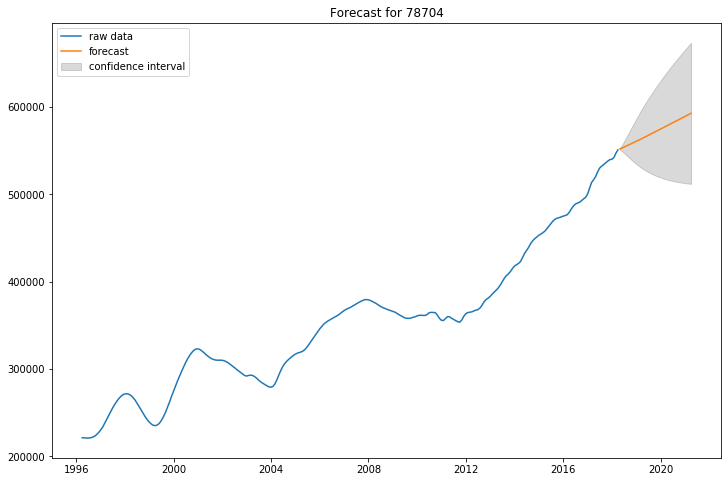

In [19]:
interpret_model(78704, 2, 1, 2)

## 78745: 7.2443% predicted return

In [66]:
evaluate_models(melt_zip(78745).value, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=4715104352.555
ARIMA(0, 0, 1) MSE=1195725757.729
ARIMA(0, 1, 0) MSE=2377705.120
ARIMA(0, 1, 1) MSE=724447.292
ARIMA(0, 2, 0) MSE=246923.712
ARIMA(0, 2, 1) MSE=179624.002
ARIMA(0, 2, 2) MSE=184154.428
ARIMA(1, 0, 0) MSE=3327684.636
ARIMA(1, 1, 0) MSE=246364.317
ARIMA(1, 1, 1) MSE=175335.875
ARIMA(1, 1, 2) MSE=183355.351
ARIMA(1, 2, 0) MSE=227650.213
ARIMA(1, 2, 1) MSE=182291.080
ARIMA(1, 2, 2) MSE=179035.495
ARIMA(2, 0, 0) MSE=253043.047
ARIMA(2, 1, 0) MSE=222775.785
ARIMA(2, 1, 1) MSE=179936.974
ARIMA(2, 2, 0) MSE=181075.410
ARIMA(2, 2, 1) MSE=169588.781
ARIMA(2, 2, 2) MSE=166485.756
ARIMA(4, 0, 0) MSE=827652.552
ARIMA(4, 1, 0) MSE=169229.746
ARIMA(4, 1, 1) MSE=172156.842
ARIMA(4, 1, 2) MSE=173940.614
ARIMA(4, 2, 0) MSE=168918.364
ARIMA(4, 2, 1) MSE=174750.767
ARIMA(6, 0, 0) MSE=173084.746
ARIMA(6, 1, 0) MSE=175229.778
ARIMA(6, 1, 1) MSE=174681.534
ARIMA(6, 2, 0) MSE=176391.868
ARIMA(6, 2, 1) MSE=177418.790
ARIMA(8, 0, 0) MSE=179184.844
ARIMA(8, 1, 0) MSE=174705.217


 I would expect a 7.2443% return on my investment in 78745


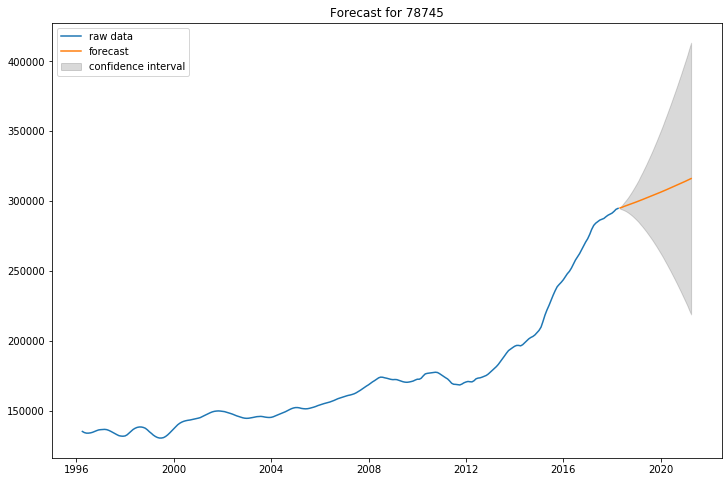

In [74]:
interpret_model(78745, 2, 2, 2)

## 78758: 33.3598% return

In [20]:
evaluate_models(melt_zip(78758).value, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=3269995664.541
ARIMA(0, 1, 0) MSE=4264050.907
ARIMA(0, 1, 1) MSE=1331985.149
ARIMA(0, 2, 0) MSE=495006.634
ARIMA(0, 2, 1) MSE=360727.322
ARIMA(1, 1, 0) MSE=500199.059
ARIMA(1, 2, 0) MSE=385877.925
ARIMA(1, 2, 1) MSE=361953.691
ARIMA(1, 2, 2) MSE=375976.583
ARIMA(2, 1, 0) MSE=360820.391
ARIMA(2, 1, 1) MSE=349144.885
ARIMA(2, 1, 2) MSE=355295.602
ARIMA(2, 2, 0) MSE=363839.059
ARIMA(2, 2, 1) MSE=374738.093
ARIMA(2, 2, 2) MSE=345406.309
ARIMA(4, 1, 0) MSE=368832.071
ARIMA(4, 2, 0) MSE=378943.504
ARIMA(4, 2, 1) MSE=383971.962
ARIMA(6, 1, 0) MSE=364803.428
ARIMA(6, 2, 0) MSE=381943.324
ARIMA(6, 2, 1) MSE=384689.906
ARIMA(8, 1, 0) MSE=372243.117
ARIMA(8, 2, 0) MSE=374303.099
ARIMA(8, 2, 1) MSE=382319.720
Best ARIMA(2, 2, 2) MSE=345406.309


 I would expect a 33.3598% return on my investment in 78758


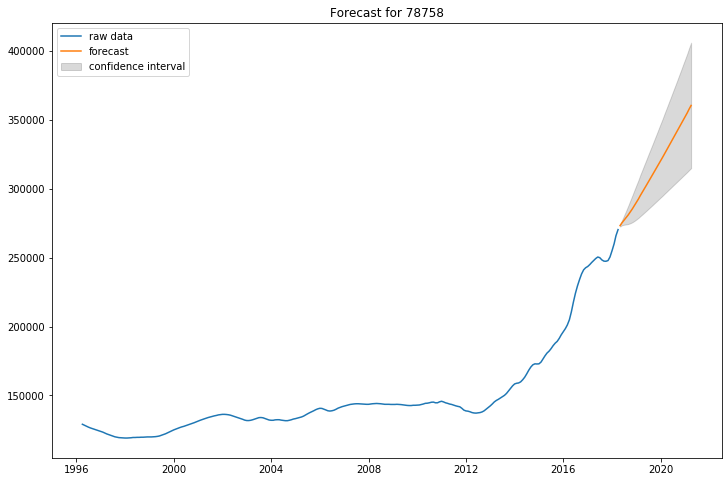

In [21]:
interpret_model(78758, 2, 2, 2)

## 78741: 11.3239% return

In [22]:
evaluate_models(melt_zip(78741).value, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=3040886727.805
ARIMA(0, 0, 1) MSE=776110435.385
ARIMA(0, 1, 0) MSE=2780509.103
ARIMA(0, 1, 1) MSE=957070.201
ARIMA(0, 2, 0) MSE=664884.180
ARIMA(0, 2, 1) MSE=518686.280
ARIMA(0, 2, 2) MSE=536353.046
ARIMA(1, 0, 0) MSE=3668321.654
ARIMA(1, 1, 0) MSE=644960.125
ARIMA(1, 1, 1) MSE=473562.629
ARIMA(1, 1, 2) MSE=508149.081
ARIMA(1, 2, 0) MSE=632628.389
ARIMA(1, 2, 1) MSE=529979.399
ARIMA(1, 2, 2) MSE=484564.271
ARIMA(2, 1, 0) MSE=577083.305
ARIMA(2, 1, 1) MSE=490898.705
ARIMA(2, 2, 0) MSE=518671.380
ARIMA(2, 2, 1) MSE=499698.841
ARIMA(4, 1, 0) MSE=487160.522
ARIMA(4, 2, 0) MSE=523421.332
ARIMA(4, 2, 1) MSE=515324.336
ARIMA(6, 0, 0) MSE=527147.564
ARIMA(6, 1, 0) MSE=521306.160
ARIMA(6, 2, 0) MSE=552956.617
ARIMA(6, 2, 1) MSE=588227.729
ARIMA(8, 0, 0) MSE=562819.454
ARIMA(8, 1, 0) MSE=547726.387
ARIMA(8, 2, 0) MSE=563003.791
Best ARIMA(1, 1, 1) MSE=473562.629


 I would expect a 11.3239% return on my investment in 78741


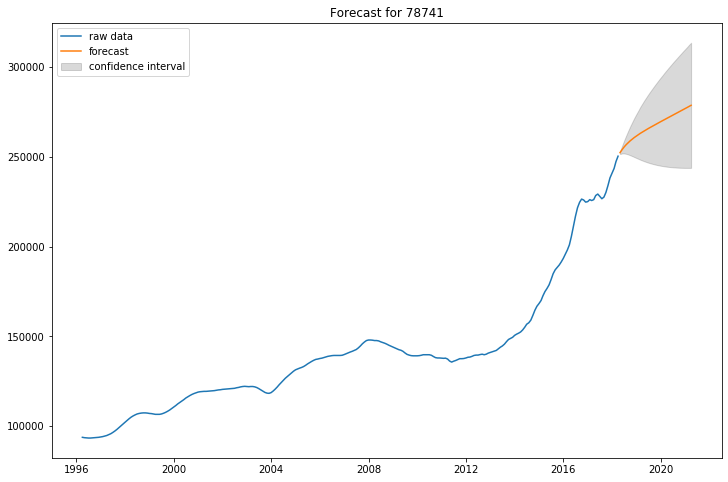

In [23]:
interpret_model(78741, 1, 1, 1)

## 78753: 25.5392% return 

In [30]:
%%time
p_values = [0, 1, 2, 4, 6]

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.34 µs


In [26]:
%%time
evaluate_models(melt_zip(78753).value, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=2126250265.012
ARIMA(0, 0, 1) MSE=542407572.148
ARIMA(0, 1, 0) MSE=2149395.274
ARIMA(0, 1, 1) MSE=732538.301
ARIMA(0, 2, 0) MSE=326299.021
ARIMA(0, 2, 1) MSE=284736.614
ARIMA(0, 2, 2) MSE=301587.137
ARIMA(1, 0, 0) MSE=2713448.337
ARIMA(1, 1, 0) MSE=321575.377
ARIMA(1, 1, 1) MSE=270935.656
ARIMA(1, 1, 2) MSE=285325.080
ARIMA(1, 2, 0) MSE=292271.713
ARIMA(2, 1, 0) MSE=272156.767
ARIMA(2, 1, 1) MSE=277717.043
ARIMA(2, 2, 0) MSE=294875.689
ARIMA(2, 2, 1) MSE=267803.289
ARIMA(4, 1, 0) MSE=289996.619
ARIMA(4, 2, 0) MSE=277187.123
ARIMA(4, 2, 1) MSE=271897.217
ARIMA(6, 1, 0) MSE=269427.188
ARIMA(6, 1, 1) MSE=268282.971
ARIMA(6, 2, 0) MSE=271822.307
ARIMA(6, 2, 1) MSE=270178.337
Best ARIMA(2, 2, 1) MSE=267803.289
CPU times: user 28min 38s, sys: 19 s, total: 28min 57s
Wall time: 21min 27s


 I would expect a 25.5392% return on my investment in 78753


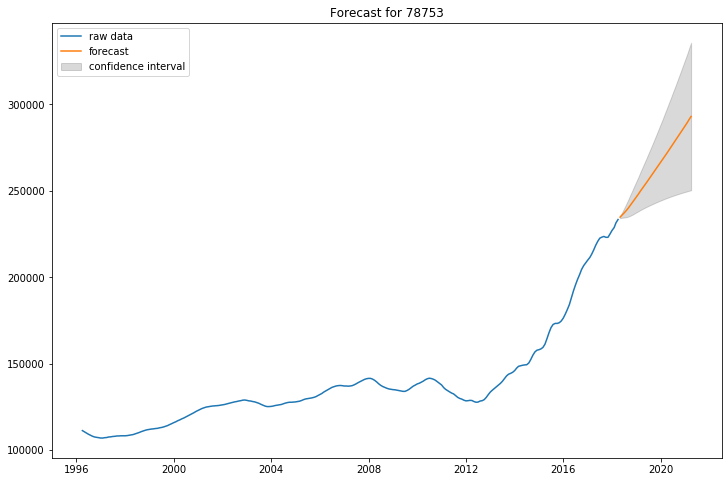

In [27]:
interpret_model(78753, 2, 2, 1)

## 78759: 7.798% return

In [31]:
%%time
evaluate_models(melt_zip(78759).value, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=7736027109.548
ARIMA(0, 1, 0) MSE=4350042.231
ARIMA(0, 1, 1) MSE=1398642.441
ARIMA(0, 2, 0) MSE=977472.087
ARIMA(0, 2, 1) MSE=699337.138
ARIMA(1, 1, 0) MSE=949823.281
ARIMA(1, 1, 1) MSE=654067.942
ARIMA(1, 1, 2) MSE=661531.535
ARIMA(1, 2, 0) MSE=999306.365
ARIMA(1, 2, 1) MSE=769929.955
ARIMA(2, 1, 0) MSE=937271.208
ARIMA(2, 1, 1) MSE=727919.275
ARIMA(2, 1, 2) MSE=668536.890
ARIMA(2, 2, 0) MSE=781623.792
ARIMA(4, 1, 0) MSE=647724.410
ARIMA(4, 1, 1) MSE=652185.119
ARIMA(4, 2, 0) MSE=685633.379
ARIMA(6, 1, 0) MSE=657385.087
ARIMA(6, 1, 1) MSE=651652.032
ARIMA(6, 1, 2) MSE=637184.458
ARIMA(6, 2, 0) MSE=696525.639
ARIMA(6, 2, 1) MSE=690837.947
Best ARIMA(6, 1, 2) MSE=637184.458
CPU times: user 21min 44s, sys: 13.4 s, total: 21min 58s
Wall time: 15min 27s


 I would expect a 7.798% return on my investment in 78759


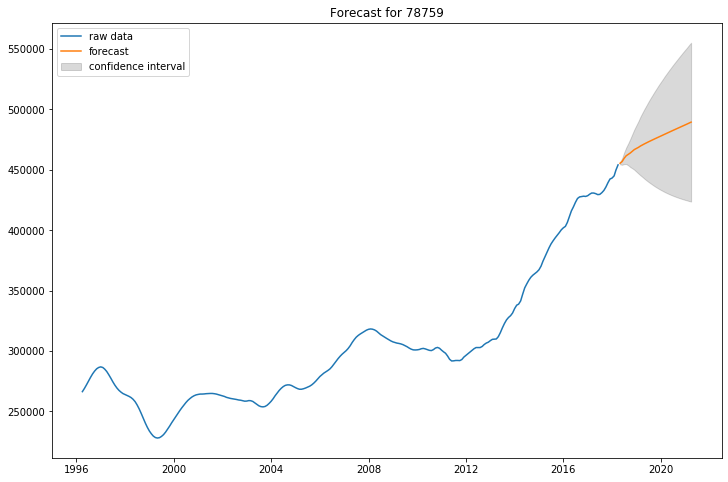

In [32]:
interpret_model(78759, 6, 1, 2)

## 78748: 5.473% return

In [33]:
evaluate_models(melt_zip(78748).value, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=2709785146.800
ARIMA(0, 0, 1) MSE=686132490.366
ARIMA(0, 1, 0) MSE=1831227.218
ARIMA(0, 1, 1) MSE=555903.207
ARIMA(0, 2, 0) MSE=207486.658
ARIMA(0, 2, 1) MSE=151758.881
ARIMA(1, 0, 0) MSE=2119436.182
ARIMA(1, 1, 0) MSE=204029.166
ARIMA(1, 1, 1) MSE=146038.765
ARIMA(1, 1, 2) MSE=159954.699
ARIMA(1, 2, 0) MSE=206720.485
ARIMA(1, 2, 1) MSE=174277.613
ARIMA(2, 0, 0) MSE=230956.402
ARIMA(2, 1, 0) MSE=198044.186
ARIMA(2, 1, 1) MSE=171408.713
ARIMA(2, 1, 2) MSE=174390.805
ARIMA(2, 2, 0) MSE=179291.178
ARIMA(2, 2, 1) MSE=171759.282
ARIMA(4, 0, 0) MSE=312740.906
ARIMA(4, 1, 1) MSE=168110.311
ARIMA(4, 2, 0) MSE=171183.266
ARIMA(4, 2, 1) MSE=160613.745
ARIMA(6, 0, 0) MSE=167147.092
ARIMA(6, 1, 1) MSE=168054.152
ARIMA(6, 1, 2) MSE=168578.800
ARIMA(6, 2, 0) MSE=174217.869
ARIMA(6, 2, 1) MSE=173648.353
Best ARIMA(1, 1, 1) MSE=146038.765


 I would expect a 5.473% return on my investment in 78748


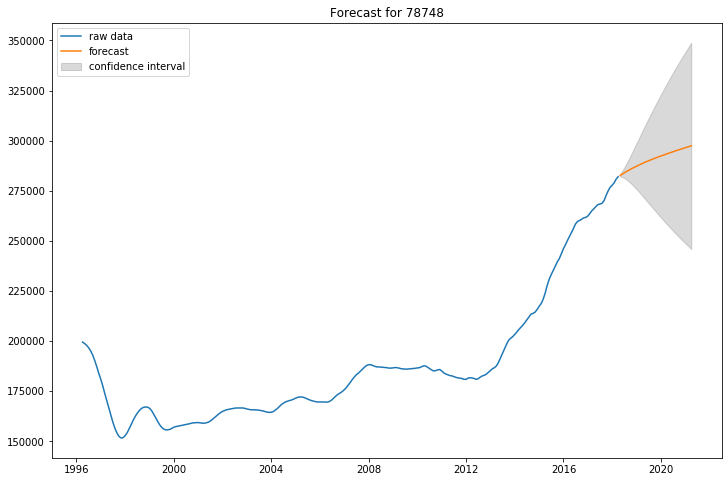

In [34]:
interpret_model(78748, 1, 1, 1)

## 78744: 8.316% return

In [35]:
evaluate_models(melt_zip(78744).value, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=1558962478.352
ARIMA(0, 0, 1) MSE=398591756.944
ARIMA(0, 1, 0) MSE=1726171.215
ARIMA(0, 1, 1) MSE=614644.792
ARIMA(0, 2, 0) MSE=446904.995
ARIMA(0, 2, 1) MSE=371827.208
ARIMA(0, 2, 2) MSE=368635.743
ARIMA(1, 0, 0) MSE=2172904.069
ARIMA(1, 1, 0) MSE=426894.456
ARIMA(1, 1, 1) MSE=328891.209
ARIMA(1, 1, 2) MSE=344789.188
ARIMA(1, 2, 0) MSE=430543.683
ARIMA(2, 1, 0) MSE=387420.560
ARIMA(2, 1, 1) MSE=339253.657
ARIMA(2, 2, 0) MSE=335908.992
ARIMA(2, 2, 1) MSE=349852.558
ARIMA(2, 2, 2) MSE=334195.906
ARIMA(4, 1, 0) MSE=331877.911
ARIMA(4, 1, 1) MSE=333037.238
ARIMA(4, 2, 0) MSE=336181.107
ARIMA(4, 2, 1) MSE=339554.833
ARIMA(6, 1, 0) MSE=346004.677
ARIMA(6, 1, 1) MSE=332176.966
ARIMA(6, 2, 0) MSE=350418.201
ARIMA(6, 2, 1) MSE=338096.434
Best ARIMA(1, 1, 1) MSE=328891.209


 I would expect a 8.316% return on my investment in 78744


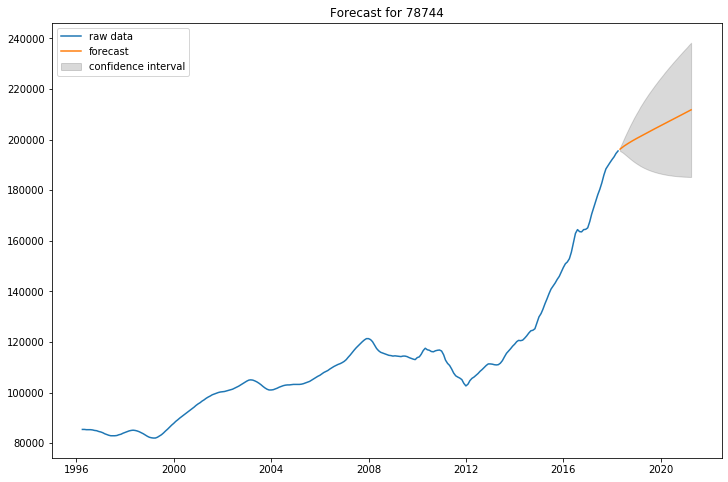

In [36]:
interpret_model(78744, 1, 1, 1)

## 78749: 8.1828% return

In [37]:
evaluate_models(melt_zip(78749).value, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=4291291855.855
ARIMA(0, 0, 1) MSE=1085525837.113
ARIMA(0, 1, 0) MSE=3248425.073
ARIMA(0, 1, 1) MSE=1033648.177
ARIMA(0, 2, 0) MSE=464012.686
ARIMA(0, 2, 1) MSE=325694.847
ARIMA(1, 0, 0) MSE=3601140.804
ARIMA(1, 1, 0) MSE=452820.705
ARIMA(1, 1, 1) MSE=312761.031
ARIMA(1, 1, 2) MSE=326985.366
ARIMA(1, 2, 0) MSE=439440.975
ARIMA(1, 2, 1) MSE=364622.008
ARIMA(1, 2, 2) MSE=357476.991
ARIMA(2, 0, 1) MSE=334236.438
ARIMA(2, 0, 2) MSE=342709.700
ARIMA(2, 1, 0) MSE=417105.912
ARIMA(2, 1, 1) MSE=352774.085
ARIMA(2, 1, 2) MSE=345757.067
ARIMA(2, 2, 0) MSE=378215.104
ARIMA(2, 2, 1) MSE=356437.036
ARIMA(2, 2, 2) MSE=354296.413
ARIMA(4, 0, 0) MSE=405757.356
ARIMA(4, 0, 1) MSE=356363.283
ARIMA(4, 0, 2) MSE=356433.670
ARIMA(4, 1, 0) MSE=344619.306
ARIMA(4, 1, 1) MSE=347027.118
ARIMA(4, 2, 0) MSE=360703.588
ARIMA(6, 0, 0) MSE=359755.353
ARIMA(6, 1, 0) MSE=352080.624
ARIMA(6, 1, 1) MSE=353301.149
ARIMA(6, 2, 0) MSE=367868.829
ARIMA(6, 2, 1) MSE=370759.184
Best ARIMA(1, 1, 1) MSE=31276

 I would expect a 8.1828% return on my investment in 78749


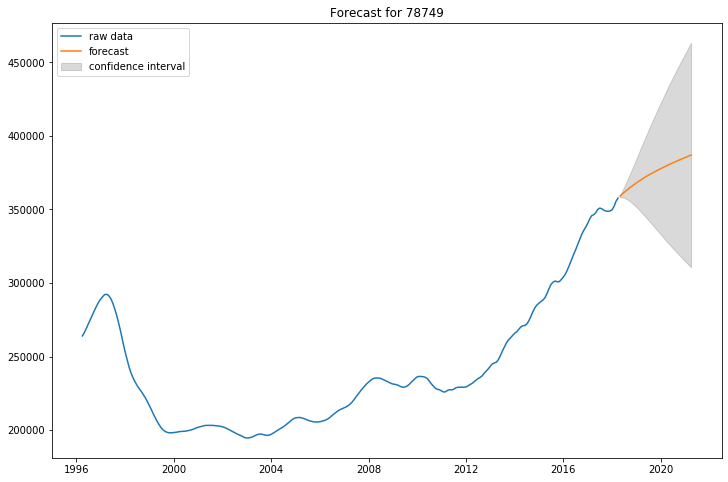

In [38]:
interpret_model(78749, 1, 1, 1)

## 78723: 9.3812% return

In [39]:
evaluate_models(melt_zip(78723).value, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=8845234078.100
ARIMA(0, 0, 1) MSE=2246785202.158
ARIMA(0, 1, 0) MSE=4228148.749
ARIMA(0, 1, 1) MSE=1225479.113
ARIMA(0, 2, 0) MSE=727968.035
ARIMA(0, 2, 1) MSE=445286.621
ARIMA(1, 0, 0) MSE=6422339.501
ARIMA(1, 1, 0) MSE=703932.522
ARIMA(1, 1, 1) MSE=419760.792
ARIMA(1, 1, 2) MSE=387026.115
ARIMA(1, 2, 0) MSE=604953.440
ARIMA(1, 2, 1) MSE=475953.737
ARIMA(1, 2, 2) MSE=437703.537
ARIMA(2, 1, 0) MSE=542796.831
ARIMA(2, 1, 1) MSE=444497.344
ARIMA(2, 1, 2) MSE=431172.723
ARIMA(2, 2, 0) MSE=502621.667
ARIMA(2, 2, 1) MSE=464314.262
ARIMA(4, 0, 0) MSE=495302.446
ARIMA(4, 1, 1) MSE=429233.801
ARIMA(4, 2, 0) MSE=462339.356
ARIMA(6, 0, 0) MSE=456225.913
ARIMA(6, 1, 1) MSE=430011.069
ARIMA(6, 2, 0) MSE=460476.112
Best ARIMA(1, 1, 2) MSE=387026.115


 I would expect a 9.3812% return on my investment in 78723


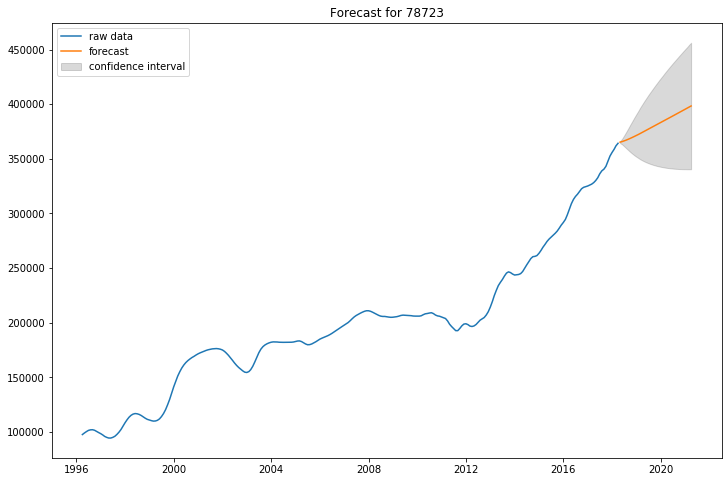

In [40]:
interpret_model(78723, 1, 1, 2)

## 78727: 7.0902% return

In [46]:
evaluate_models(melt_zip(78727).value, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=4292946910.446
ARIMA(0, 0, 1) MSE=1091472880.349
ARIMA(0, 1, 0) MSE=3051392.859
ARIMA(0, 1, 1) MSE=947130.388
ARIMA(0, 2, 0) MSE=545219.800
ARIMA(0, 2, 1) MSE=385328.791
ARIMA(1, 0, 0) MSE=4100281.153
ARIMA(1, 1, 0) MSE=531774.835
ARIMA(1, 1, 1) MSE=360611.816
ARIMA(1, 1, 2) MSE=386710.505
ARIMA(1, 2, 0) MSE=498099.404
ARIMA(1, 2, 1) MSE=400586.775
ARIMA(1, 2, 2) MSE=369301.132
ARIMA(2, 1, 0) MSE=461868.759
ARIMA(2, 1, 1) MSE=378933.376
ARIMA(2, 2, 0) MSE=409893.231
ARIMA(2, 2, 1) MSE=381666.047
ARIMA(2, 2, 2) MSE=399714.389
ARIMA(4, 0, 0) MSE=33490311.680
ARIMA(4, 1, 0) MSE=377280.075
ARIMA(4, 2, 0) MSE=375371.427
ARIMA(4, 2, 1) MSE=383982.391
ARIMA(6, 0, 0) MSE=376491.388
ARIMA(6, 1, 0) MSE=373007.695
ARIMA(6, 1, 1) MSE=366891.948
ARIMA(6, 2, 0) MSE=380232.282
ARIMA(6, 2, 1) MSE=379333.222
Best ARIMA(1, 1, 1) MSE=360611.816


 I would expect a 7.0902% return on my investment in 78727


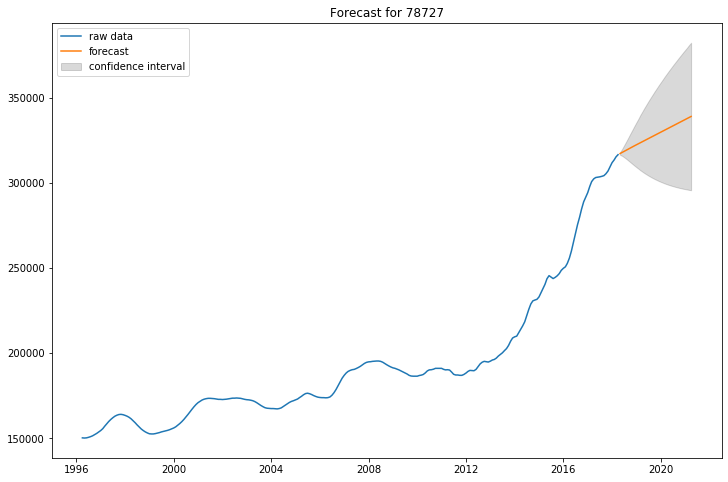

In [47]:
interpret_model(78727, 1, 1, 1)

## 78717: 5.1274% return

In [48]:
p_values = [0, 1, 2, 4]
evaluate_models(melt_zip(78717).value, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=3832582583.056
ARIMA(0, 0, 1) MSE=973463583.251
ARIMA(0, 1, 0) MSE=2875230.323
ARIMA(0, 1, 1) MSE=1058993.250
ARIMA(0, 2, 0) MSE=1011293.524
ARIMA(0, 2, 1) MSE=698537.031
ARIMA(1, 0, 0) MSE=3883481.812
ARIMA(1, 1, 0) MSE=950153.854
ARIMA(1, 1, 2) MSE=554959.548
ARIMA(1, 2, 0) MSE=991708.934
ARIMA(1, 2, 1) MSE=748675.381
ARIMA(2, 0, 0) MSE=1008678.843
ARIMA(2, 1, 0) MSE=857887.562
ARIMA(2, 1, 1) MSE=657182.861
ARIMA(2, 1, 2) MSE=569842.155
ARIMA(2, 2, 0) MSE=667376.974
ARIMA(2, 2, 1) MSE=628077.424
ARIMA(2, 2, 2) MSE=626373.977
ARIMA(4, 0, 0) MSE=954330.920
ARIMA(4, 1, 0) MSE=571563.376
ARIMA(4, 1, 1) MSE=575112.901
ARIMA(4, 1, 2) MSE=565676.865
ARIMA(4, 2, 0) MSE=637733.313
ARIMA(4, 2, 1) MSE=623100.640
Best ARIMA(1, 1, 2) MSE=554959.548


 I would expect a 5.1274% return on my investment in 78717


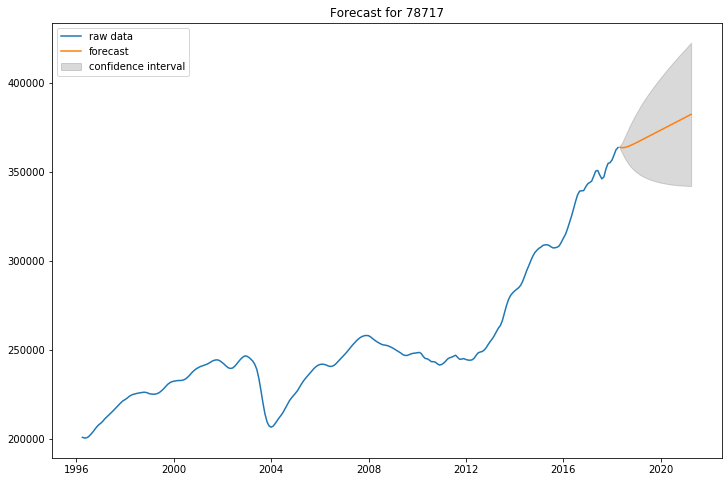

In [49]:
interpret_model(78717, 1, 1, 2)

## 78731: 5.3909% return

In [50]:
evaluate_models(melt_zip(78731).value, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=9106856205.404
ARIMA(0, 0, 1) MSE=2319065652.537
ARIMA(0, 1, 0) MSE=10585418.010
ARIMA(0, 1, 1) MSE=3962744.731
ARIMA(0, 2, 0) MSE=4437437.040
ARIMA(0, 2, 1) MSE=3348660.648
ARIMA(1, 0, 0) MSE=13119966.760
ARIMA(1, 1, 0) MSE=4336769.567
ARIMA(1, 1, 2) MSE=2630039.535
ARIMA(1, 2, 0) MSE=4717201.823
ARIMA(2, 1, 0) MSE=4297667.671
ARIMA(2, 1, 2) MSE=2774800.564
ARIMA(2, 2, 0) MSE=3287820.009
ARIMA(2, 2, 1) MSE=2874957.062
ARIMA(2, 2, 2) MSE=3118992.204
ARIMA(4, 1, 0) MSE=2711192.697
ARIMA(4, 1, 1) MSE=2743571.910
ARIMA(4, 2, 0) MSE=2874306.566
ARIMA(4, 2, 1) MSE=2974363.006
Best ARIMA(1, 1, 2) MSE=2630039.535


 I would expect a 5.3909% return on my investment in 78731


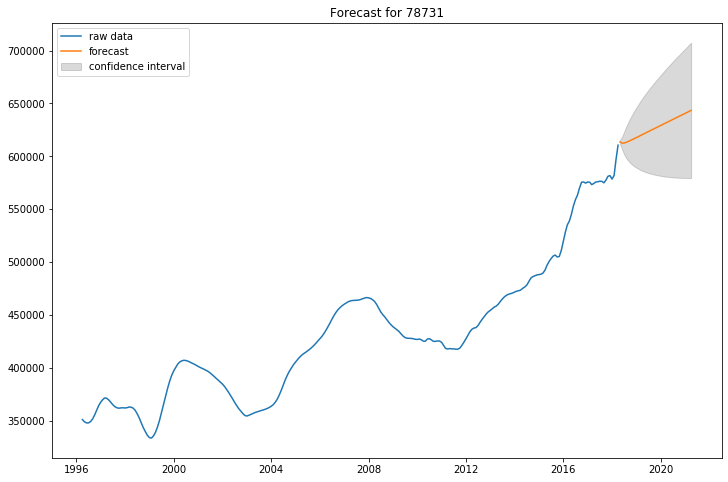

In [51]:
interpret_model(78731, 1, 1, 2)

## 78705: 8.7422% return

In [52]:
evaluate_models(melt_zip(78705).value, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=9487565701.458
ARIMA(0, 0, 1) MSE=2405875148.819
ARIMA(0, 1, 0) MSE=14792208.799
ARIMA(0, 1, 1) MSE=5832941.065
ARIMA(0, 2, 0) MSE=5698438.820
ARIMA(0, 2, 1) MSE=4112747.683
ARIMA(1, 0, 0) MSE=16308763.480
ARIMA(1, 1, 0) MSE=5423323.840
ARIMA(1, 1, 2) MSE=2908129.777
ARIMA(1, 2, 0) MSE=5218681.441
ARIMA(2, 0, 0) MSE=5517479.746
ARIMA(2, 1, 0) MSE=4467722.322
ARIMA(2, 1, 2) MSE=2849865.631
ARIMA(2, 2, 0) MSE=4220038.322
ARIMA(2, 2, 1) MSE=3897918.293
ARIMA(2, 2, 2) MSE=3470855.271
ARIMA(4, 0, 0) MSE=4093707.951
ARIMA(4, 0, 1) MSE=3729930.118
ARIMA(4, 0, 2) MSE=2972868.600
ARIMA(4, 1, 1) MSE=3592697.280
ARIMA(4, 2, 0) MSE=3670439.243
ARIMA(4, 2, 1) MSE=3691452.619
Best ARIMA(2, 1, 2) MSE=2849865.631


 I would expect a 8.7422% return on my investment in 78705


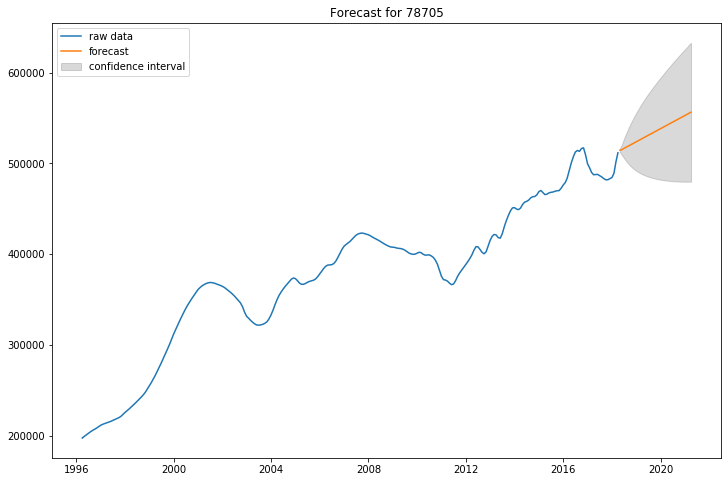

In [53]:
interpret_model(78705, 2, 1, 2)

## 78703: 7.3623% return

In [54]:
evaluate_models(melt_zip(78703).value, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=38867734412.622
ARIMA(0, 0, 1) MSE=9876735377.985
ARIMA(0, 1, 0) MSE=25535581.992
ARIMA(0, 1, 1) MSE=10134536.257
ARIMA(0, 2, 0) MSE=14031445.976
ARIMA(0, 2, 1) MSE=10319421.454
ARIMA(1, 0, 0) MSE=34811641.399
ARIMA(1, 1, 0) MSE=12857711.246
ARIMA(1, 1, 1) MSE=8670730.935
ARIMA(1, 1, 2) MSE=7752676.063
ARIMA(1, 2, 0) MSE=13813122.597
ARIMA(1, 2, 1) MSE=10740536.539
ARIMA(2, 1, 0) MSE=11667363.664
ARIMA(2, 1, 1) MSE=9099702.446
ARIMA(2, 1, 2) MSE=6935880.740
ARIMA(2, 2, 0) MSE=9616462.846
ARIMA(2, 2, 1) MSE=9667041.676
ARIMA(4, 0, 0) MSE=4584457685.845
ARIMA(4, 1, 0) MSE=8461537.908
ARIMA(4, 1, 1) MSE=8385370.175
ARIMA(4, 2, 0) MSE=8493051.685
ARIMA(4, 2, 1) MSE=8452104.261
Best ARIMA(2, 1, 2) MSE=6935880.740


 I would expect a 7.3623% return on my investment in 78703


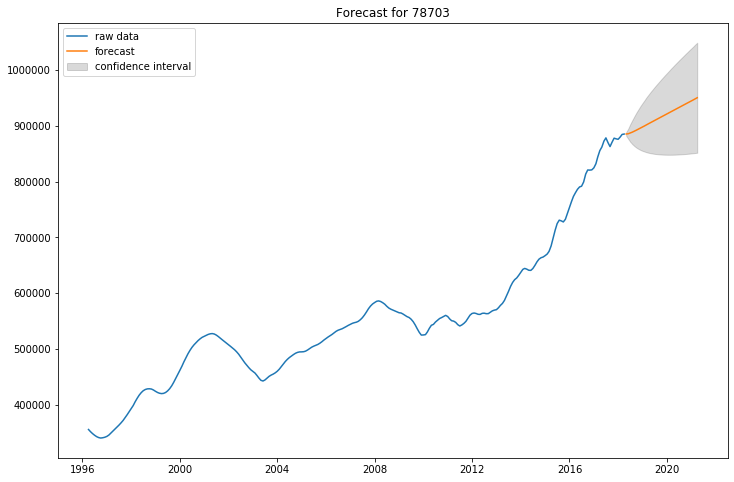

In [55]:
interpret_model(78703, 2, 1, 2)

## 78728: 7.6064% return 

In [56]:
evaluate_models(melt_zip(78728).value, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=2718525921.212
ARIMA(0, 0, 1) MSE=690019199.453
ARIMA(0, 1, 0) MSE=1691011.178
ARIMA(0, 1, 1) MSE=549667.160
ARIMA(0, 2, 0) MSE=353191.095
ARIMA(0, 2, 1) MSE=249596.625
ARIMA(1, 0, 0) MSE=2295123.740
ARIMA(1, 1, 0) MSE=339883.165
ARIMA(1, 1, 1) MSE=229102.269
ARIMA(1, 1, 2) MSE=211634.163
ARIMA(1, 2, 0) MSE=333817.149
ARIMA(1, 2, 1) MSE=254869.067
ARIMA(1, 2, 2) MSE=244266.197
ARIMA(2, 1, 0) MSE=303678.369
ARIMA(2, 1, 1) MSE=232282.290
ARIMA(2, 1, 2) MSE=203987.360
ARIMA(2, 2, 0) MSE=211592.108
ARIMA(2, 2, 1) MSE=201779.146
ARIMA(4, 0, 0) MSE=21442405.661
ARIMA(4, 1, 0) MSE=192892.842
ARIMA(4, 1, 1) MSE=195826.604
ARIMA(4, 2, 0) MSE=201537.974
ARIMA(4, 2, 1) MSE=197275.000
Best ARIMA(4, 1, 0) MSE=192892.842


 I would expect a 7.6064% return on my investment in 78728


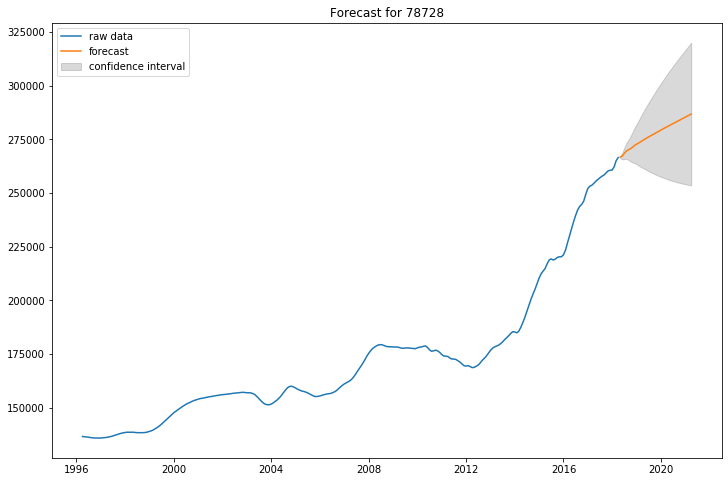

In [57]:
interpret_model(78728, 4, 1, 0)

## 78750: 5.4904% return

In [58]:
evaluate_models(melt_zip(78750).value, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=6704143586.800
ARIMA(0, 0, 1) MSE=1699470723.838
ARIMA(0, 1, 0) MSE=4654996.584
ARIMA(0, 1, 1) MSE=1563525.601
ARIMA(0, 2, 0) MSE=1204603.202
ARIMA(0, 2, 1) MSE=859533.207
ARIMA(1, 0, 0) MSE=6007861.351
ARIMA(1, 1, 0) MSE=1159789.278
ARIMA(1, 1, 1) MSE=783095.121
ARIMA(1, 1, 2) MSE=743267.336
ARIMA(1, 2, 0) MSE=1126643.572
ARIMA(1, 2, 1) MSE=904061.635
ARIMA(2, 0, 0) MSE=1201763.382
ARIMA(2, 1, 0) MSE=1005014.389
ARIMA(2, 1, 1) MSE=821017.487
ARIMA(2, 1, 2) MSE=731135.537
ARIMA(2, 2, 0) MSE=873402.922
ARIMA(2, 2, 1) MSE=848896.729
ARIMA(4, 0, 0) MSE=2303050869.465
ARIMA(4, 1, 0) MSE=830700.982
ARIMA(4, 1, 1) MSE=816115.273
ARIMA(4, 2, 0) MSE=810231.605
Best ARIMA(2, 1, 2) MSE=731135.537


 I would expect a 5.4904% return on my investment in 78750


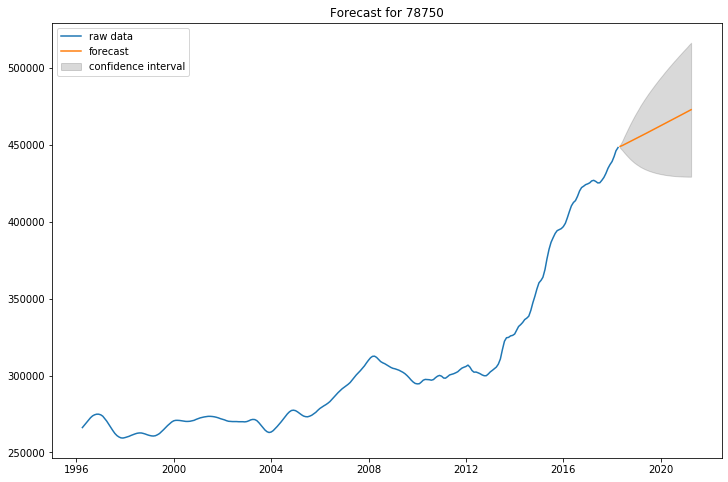

In [59]:
interpret_model(78750, 2, 1, 2)

## 78746: 3.1542% return

In [60]:
evaluate_models(melt_zip(78746).value, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=30116863621.579
ARIMA(0, 0, 1) MSE=7638898518.694
ARIMA(0, 1, 0) MSE=24801033.368
ARIMA(0, 1, 1) MSE=12352504.000
ARIMA(0, 2, 0) MSE=11654144.425
ARIMA(0, 2, 1) MSE=9052181.791
ARIMA(1, 0, 0) MSE=32104474.165
ARIMA(1, 1, 0) MSE=10938022.860
ARIMA(1, 2, 0) MSE=12317630.203
ARIMA(1, 2, 1) MSE=10117058.963
ARIMA(2, 0, 0) MSE=11607751.093
ARIMA(2, 1, 1) MSE=9084467.744
ARIMA(2, 1, 2) MSE=7358771.774
ARIMA(2, 2, 0) MSE=9695398.265
ARIMA(2, 2, 1) MSE=9372601.610
ARIMA(4, 1, 1) MSE=8455936.974
ARIMA(4, 2, 0) MSE=9325653.630
Best ARIMA(2, 1, 2) MSE=7358771.774


 I would expect a 3.1542% return on my investment in 78746


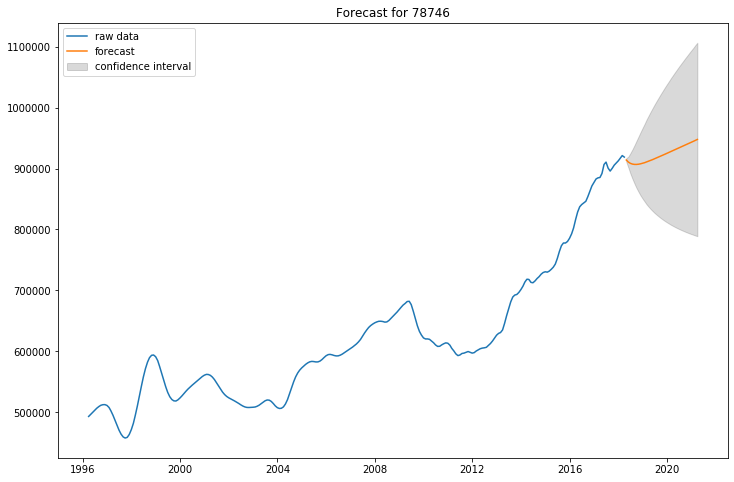

In [61]:
interpret_model(78746, 2, 1, 2)

## 78757: 6.3797% return

In [62]:
evaluate_models(melt_zip(78757).value, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=10852671160.431
ARIMA(0, 0, 1) MSE=2751965974.391
ARIMA(0, 1, 0) MSE=3209945.623
ARIMA(0, 1, 1) MSE=1157022.520
ARIMA(0, 2, 0) MSE=817549.610
ARIMA(0, 2, 1) MSE=536476.473
ARIMA(1, 0, 0) MSE=5546130.207
ARIMA(1, 1, 0) MSE=785646.905
ARIMA(1, 1, 2) MSE=496178.572
ARIMA(1, 2, 0) MSE=699861.447
ARIMA(1, 2, 1) MSE=575380.508
ARIMA(1, 2, 2) MSE=565564.501
ARIMA(2, 0, 0) MSE=829648.974
ARIMA(2, 1, 1) MSE=532345.378
ARIMA(2, 1, 2) MSE=548212.168
ARIMA(2, 2, 0) MSE=601384.535
ARIMA(2, 2, 1) MSE=592706.826
ARIMA(4, 0, 0) MSE=1041581.574
ARIMA(4, 1, 1) MSE=551844.304
ARIMA(4, 2, 0) MSE=549591.296
ARIMA(4, 2, 1) MSE=575639.019
Best ARIMA(1, 1, 2) MSE=496178.572


 I would expect a 6.3797% return on my investment in 78757


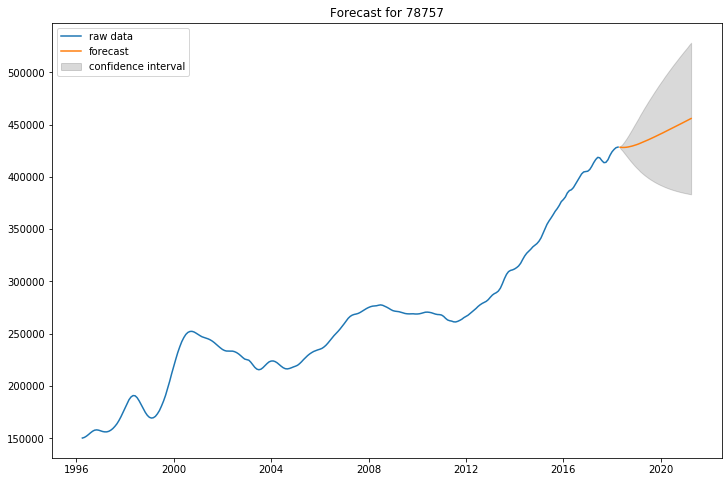

In [63]:
interpret_model(78757, 1, 1, 2)

## 78702: 10.3191% return

In [64]:
evaluate_models(melt_zip(78702).value, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=13062324156.059
ARIMA(0, 0, 1) MSE=3324426087.503
ARIMA(0, 1, 0) MSE=4658802.329
ARIMA(0, 1, 1) MSE=1432797.846
ARIMA(0, 2, 0) MSE=1355641.456
ARIMA(0, 2, 1) MSE=808654.688
ARIMA(1, 0, 0) MSE=8498040.147
ARIMA(1, 1, 0) MSE=1297951.902
ARIMA(1, 1, 2) MSE=692964.097
ARIMA(1, 2, 0) MSE=1191314.883
ARIMA(1, 2, 1) MSE=850835.685
ARIMA(1, 2, 2) MSE=758133.988
ARIMA(2, 0, 0) MSE=1346369.672
ARIMA(2, 1, 0) MSE=1067935.643
ARIMA(2, 1, 1) MSE=779748.562
ARIMA(2, 1, 2) MSE=706356.656
ARIMA(2, 2, 0) MSE=880512.117
ARIMA(2, 2, 1) MSE=788442.728
ARIMA(4, 0, 1) MSE=783196.440
ARIMA(4, 0, 2) MSE=749345.318
ARIMA(4, 1, 1) MSE=749685.333
ARIMA(4, 1, 2) MSE=759384.266
ARIMA(4, 2, 0) MSE=786258.010
ARIMA(4, 2, 1) MSE=796566.981
Best ARIMA(1, 1, 2) MSE=692964.097


 I would expect a 10.3191% return on my investment in 78702


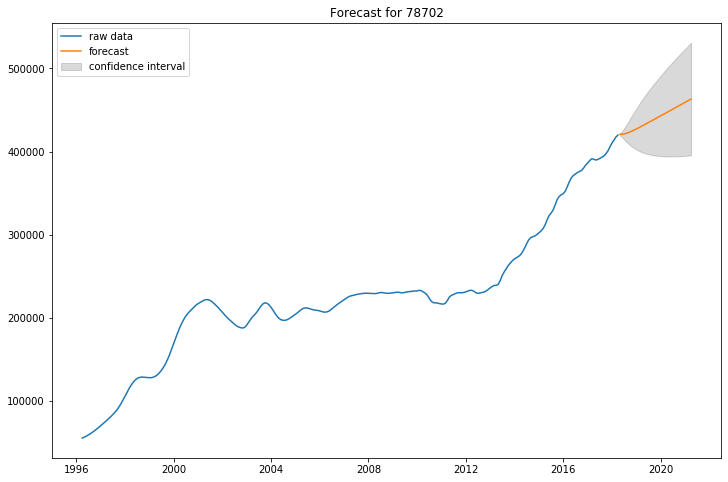

In [65]:
interpret_model(78702, 1, 1, 2)

## 78751: 9.6405% return

In [66]:
evaluate_models(melt_zip(78751).value, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=10354910359.404
ARIMA(0, 0, 1) MSE=2628367733.223
ARIMA(0, 1, 0) MSE=4926627.909
ARIMA(0, 1, 1) MSE=1748499.152
ARIMA(0, 2, 0) MSE=1694682.166
ARIMA(0, 2, 1) MSE=1242150.887
ARIMA(1, 0, 0) MSE=7469147.827
ARIMA(1, 1, 0) MSE=1620314.175
ARIMA(1, 1, 2) MSE=1077184.106
ARIMA(1, 2, 0) MSE=1576850.205
ARIMA(1, 2, 1) MSE=1296884.528
ARIMA(1, 2, 2) MSE=1104143.978
ARIMA(2, 0, 0) MSE=1661842.876
ARIMA(2, 0, 2) MSE=1151122.639
ARIMA(2, 1, 0) MSE=1412708.269
ARIMA(2, 1, 1) MSE=1186033.333
ARIMA(2, 2, 0) MSE=1301287.176
ARIMA(2, 2, 1) MSE=1239805.475
ARIMA(4, 0, 0) MSE=1317890.759
ARIMA(4, 0, 1) MSE=1209860.172
ARIMA(4, 1, 1) MSE=1168718.970
ARIMA(4, 2, 0) MSE=1196710.293
ARIMA(4, 2, 1) MSE=1204087.774
Best ARIMA(1, 1, 2) MSE=1077184.106


 I would expect a 9.6405% return on my investment in 78751


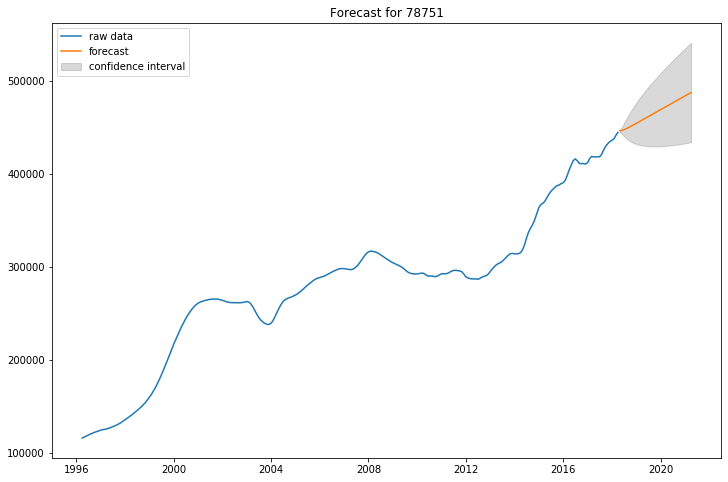

In [67]:
interpret_model(78751, 1, 1, 2)

## 78735: 10.4326% return

In [68]:
evaluate_models(melt_zip(78735).value, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=2902521675.155
ARIMA(0, 0, 1) MSE=716806585.201
ARIMA(0, 1, 0) MSE=15776410.897
ARIMA(0, 1, 1) MSE=4365496.772
ARIMA(0, 2, 0) MSE=1685083.138
ARIMA(0, 2, 1) MSE=1064993.864
ARIMA(1, 0, 0) MSE=6675448.079
ARIMA(1, 1, 0) MSE=1667850.753
ARIMA(1, 1, 2) MSE=995036.215
ARIMA(1, 2, 0) MSE=1572071.702
ARIMA(1, 2, 1) MSE=1115953.876
ARIMA(2, 0, 0) MSE=1651710.137
ARIMA(2, 0, 2) MSE=995524.910
ARIMA(2, 1, 1) MSE=1088461.630
ARIMA(2, 1, 2) MSE=992437.595
ARIMA(2, 2, 0) MSE=1108834.255
ARIMA(2, 2, 1) MSE=987353.474
ARIMA(2, 2, 2) MSE=898101.675
ARIMA(4, 0, 0) MSE=1067582.751
ARIMA(4, 0, 1) MSE=961813.290
ARIMA(4, 0, 2) MSE=900665.954
ARIMA(4, 1, 1) MSE=968634.929
ARIMA(4, 1, 2) MSE=917290.937
ARIMA(4, 2, 0) MSE=987997.234
ARIMA(4, 2, 1) MSE=960916.570
ARIMA(4, 2, 2) MSE=925096.255
Best ARIMA(2, 2, 2) MSE=898101.675


 I would expect a 10.4326% return on my investment in 78735


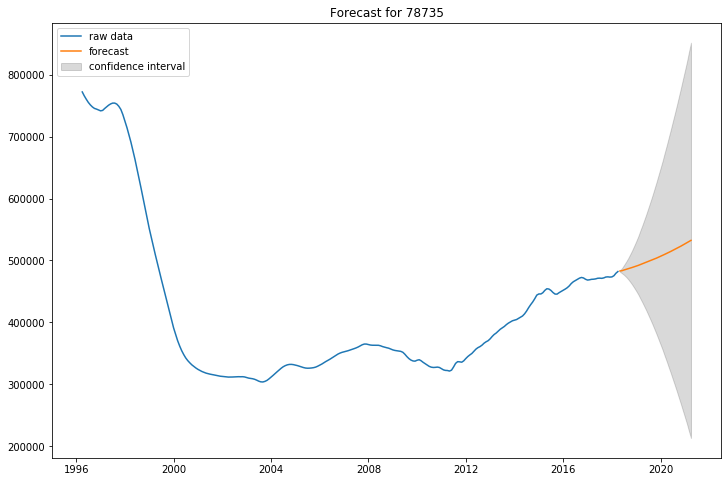

In [69]:
interpret_model(78735, 2, 2, 2)

## 78754: 8.9897% return

In [70]:
evaluate_models(melt_zip(78754).value, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=1605652704.789
ARIMA(0, 0, 1) MSE=408217920.389
ARIMA(0, 1, 0) MSE=1727976.947
ARIMA(0, 1, 1) MSE=538050.386
ARIMA(0, 2, 0) MSE=322080.047
ARIMA(0, 2, 1) MSE=222138.639
ARIMA(1, 0, 0) MSE=2115200.990
ARIMA(1, 1, 0) MSE=315060.026
ARIMA(1, 1, 1) MSE=208350.526
ARIMA(1, 1, 2) MSE=210581.395
ARIMA(1, 2, 0) MSE=290838.129
ARIMA(1, 2, 1) MSE=240437.092
ARIMA(1, 2, 2) MSE=230634.780
ARIMA(2, 1, 0) MSE=265447.272
ARIMA(2, 1, 1) MSE=226024.897
ARIMA(2, 1, 2) MSE=218469.703
ARIMA(2, 2, 0) MSE=233296.928
ARIMA(2, 2, 1) MSE=229880.836
ARIMA(2, 2, 2) MSE=232481.424
ARIMA(4, 1, 0) MSE=225063.434
ARIMA(4, 1, 1) MSE=229906.074
ARIMA(4, 2, 0) MSE=239515.918
ARIMA(4, 2, 1) MSE=241806.239
Best ARIMA(1, 1, 1) MSE=208350.526


 I would expect a 8.9897% return on my investment in 78754


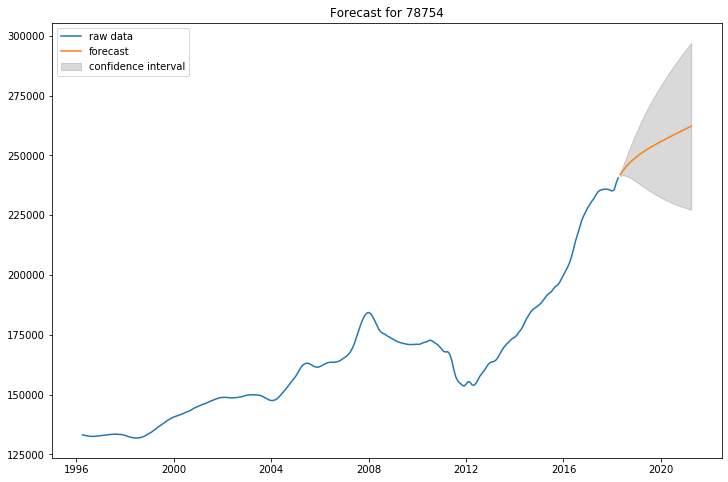

In [71]:
interpret_model(78754, 1, 1, 1)

## 78752: 9.5474% return

In [72]:
evaluate_models(melt_zip(78752).value, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=6781737290.197
ARIMA(0, 0, 1) MSE=1715085310.947
ARIMA(0, 1, 0) MSE=5805696.118
ARIMA(0, 1, 1) MSE=1759705.417
ARIMA(0, 2, 0) MSE=900693.433
ARIMA(0, 2, 1) MSE=618793.855
ARIMA(1, 0, 0) MSE=7088489.870
ARIMA(1, 1, 0) MSE=881150.665
ARIMA(1, 1, 1) MSE=584780.110
ARIMA(1, 1, 2) MSE=618766.750
ARIMA(1, 2, 0) MSE=792654.003
ARIMA(1, 2, 1) MSE=636304.894
ARIMA(1, 2, 2) MSE=623243.954
ARIMA(2, 0, 0) MSE=898071.770
ARIMA(2, 1, 0) MSE=740329.451
ARIMA(2, 1, 1) MSE=604613.159
ARIMA(2, 1, 2) MSE=614042.593
ARIMA(2, 2, 0) MSE=683768.180
ARIMA(4, 0, 0) MSE=677514.209
ARIMA(4, 1, 0) MSE=599412.187
ARIMA(4, 1, 1) MSE=589753.485
ARIMA(4, 2, 0) MSE=610655.043
ARIMA(4, 2, 1) MSE=608557.416
Best ARIMA(1, 1, 1) MSE=584780.110


 I would expect a 9.5474% return on my investment in 78752


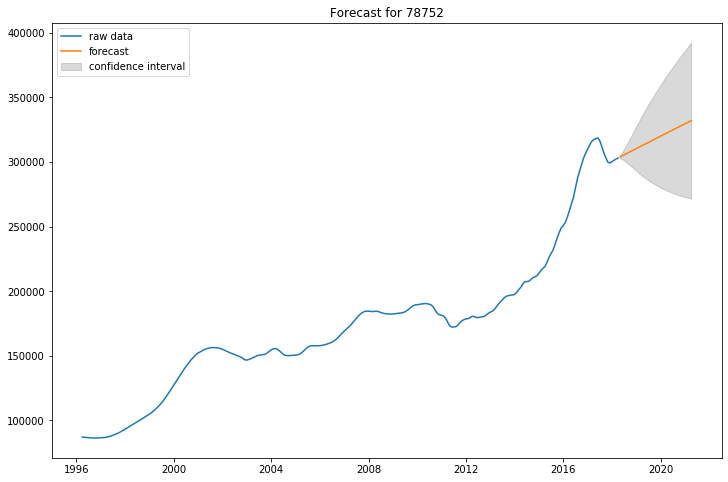

In [73]:
interpret_model(78752, 1, 1, 1)

## 78617: 5.9495% return 

In [74]:
evaluate_models(melt_zip(78617).value, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=845792542.068
ARIMA(0, 1, 0) MSE=1104976.801
ARIMA(0, 1, 1) MSE=362458.317
ARIMA(0, 2, 0) MSE=182030.176
ARIMA(0, 2, 1) MSE=150266.816
ARIMA(0, 2, 2) MSE=158995.487
ARIMA(1, 1, 0) MSE=178225.362
ARIMA(1, 1, 1) MSE=141884.384
ARIMA(1, 1, 2) MSE=150630.145
ARIMA(1, 2, 0) MSE=171235.977
ARIMA(1, 2, 1) MSE=154516.973
ARIMA(1, 2, 2) MSE=148005.225
ARIMA(2, 1, 0) MSE=160647.812
ARIMA(2, 1, 1) MSE=147114.331
ARIMA(2, 2, 0) MSE=146809.841
ARIMA(2, 2, 1) MSE=148765.438
ARIMA(2, 2, 2) MSE=157988.351
ARIMA(4, 1, 0) MSE=147845.813
ARIMA(4, 1, 1) MSE=149381.959
ARIMA(4, 1, 2) MSE=152718.252
ARIMA(4, 2, 0) MSE=155636.134
ARIMA(4, 2, 1) MSE=155896.771
Best ARIMA(1, 1, 1) MSE=141884.384


 I would expect a 5.9495% return on my investment in 78617


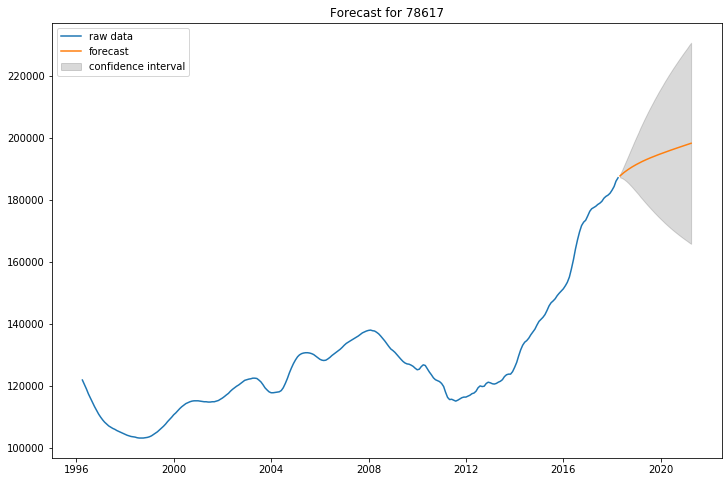

In [75]:
interpret_model(78617, 1, 1, 1)

## 78724: 4.8088% return

In [76]:
evaluate_models(melt_zip(78724).value, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=1148085487.449
ARIMA(0, 0, 1) MSE=292842468.687
ARIMA(0, 1, 0) MSE=1821684.397
ARIMA(0, 1, 1) MSE=566055.130
ARIMA(0, 2, 0) MSE=390790.573
ARIMA(0, 2, 1) MSE=266312.826
ARIMA(1, 0, 0) MSE=2136973.334
ARIMA(1, 1, 0) MSE=378016.288
ARIMA(1, 1, 1) MSE=244087.894
ARIMA(1, 1, 2) MSE=253344.407
ARIMA(1, 2, 0) MSE=360574.652
ARIMA(1, 2, 1) MSE=270719.139
ARIMA(1, 2, 2) MSE=253328.100
ARIMA(2, 1, 0) MSE=328961.352
ARIMA(2, 1, 1) MSE=249581.716
ARIMA(2, 1, 2) MSE=249012.509
ARIMA(2, 2, 0) MSE=264944.821
ARIMA(2, 2, 1) MSE=244696.679
ARIMA(2, 2, 2) MSE=257716.657
ARIMA(4, 1, 0) MSE=238262.373
ARIMA(4, 1, 1) MSE=241284.803
ARIMA(4, 2, 0) MSE=247613.004
ARIMA(4, 2, 1) MSE=248743.067
Best ARIMA(4, 1, 0) MSE=238262.373


 I would expect a 4.8088% return on my investment in 78724


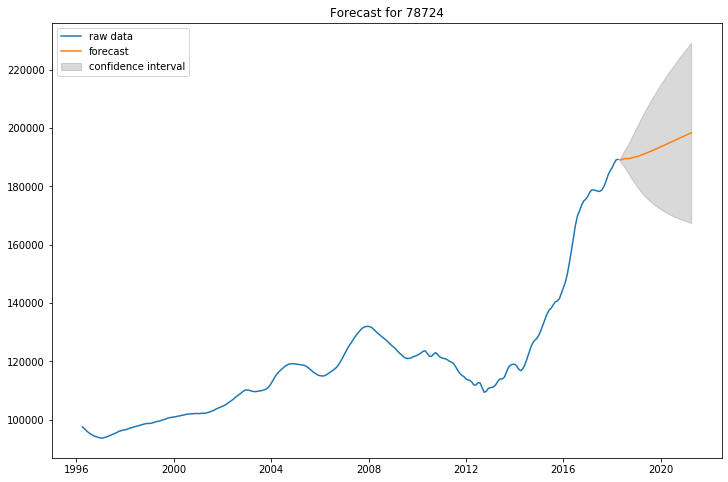

In [77]:
interpret_model(78724, 4, 1, 0)

## 78747: 5.9019% return

In [78]:
evaluate_models(melt_zip(78747).value, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=1608889619.211
ARIMA(0, 0, 1) MSE=409552678.801
ARIMA(0, 1, 0) MSE=1633269.279
ARIMA(0, 1, 1) MSE=588463.554
ARIMA(0, 2, 0) MSE=380716.821
ARIMA(0, 2, 1) MSE=285115.910
ARIMA(1, 0, 0) MSE=1839147.237
ARIMA(1, 1, 0) MSE=366637.143
ARIMA(1, 1, 1) MSE=262556.340
ARIMA(1, 1, 2) MSE=263643.331
ARIMA(1, 2, 0) MSE=361460.077
ARIMA(1, 2, 1) MSE=295609.727
ARIMA(1, 2, 2) MSE=274337.922
ARIMA(2, 0, 0) MSE=388977.033
ARIMA(2, 1, 0) MSE=328804.693
ARIMA(2, 1, 1) MSE=271912.443
ARIMA(2, 1, 2) MSE=241134.668
ARIMA(2, 2, 0) MSE=276318.147
ARIMA(2, 2, 1) MSE=269786.925
ARIMA(2, 2, 2) MSE=275440.913
ARIMA(4, 0, 0) MSE=329479.655
ARIMA(4, 1, 0) MSE=262249.152
ARIMA(4, 1, 1) MSE=264060.720
ARIMA(4, 1, 2) MSE=240069.682
ARIMA(4, 2, 0) MSE=261239.116
ARIMA(4, 2, 1) MSE=259903.711
Best ARIMA(4, 1, 2) MSE=240069.682


 I would expect a 5.9019% return on my investment in 78747


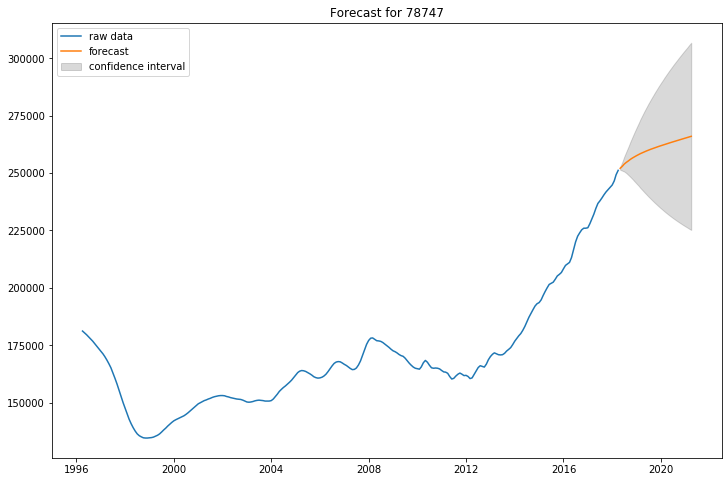

In [79]:
interpret_model(78747, 4, 1, 2)

## 78737: 5.6047% return

In [80]:
evaluate_models(melt_zip(78737).value, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=5670241927.753
ARIMA(0, 0, 1) MSE=1442635472.305
ARIMA(0, 1, 0) MSE=3925465.031
ARIMA(0, 1, 1) MSE=1446548.028
ARIMA(0, 2, 0) MSE=1475185.767
ARIMA(0, 2, 1) MSE=983949.703
ARIMA(1, 0, 0) MSE=5464225.636
ARIMA(1, 1, 0) MSE=1381149.939
ARIMA(1, 1, 1) MSE=869245.357
ARIMA(1, 1, 2) MSE=745204.133
ARIMA(1, 2, 0) MSE=1320765.252
ARIMA(1, 2, 1) MSE=994372.000
ARIMA(1, 2, 2) MSE=843605.517
ARIMA(2, 0, 0) MSE=1450069.772
ARIMA(2, 1, 0) MSE=1101459.827
ARIMA(2, 1, 1) MSE=840609.467
ARIMA(2, 1, 2) MSE=737218.969
ARIMA(2, 2, 0) MSE=784321.718
ARIMA(2, 2, 1) MSE=785224.839
ARIMA(2, 2, 2) MSE=820761.627
ARIMA(4, 0, 0) MSE=1237869.676
ARIMA(4, 1, 0) MSE=754277.704
ARIMA(4, 1, 1) MSE=767364.880
ARIMA(4, 2, 0) MSE=791840.666
Best ARIMA(2, 1, 2) MSE=737218.969


 I would expect a 5.6047% return on my investment in 78737


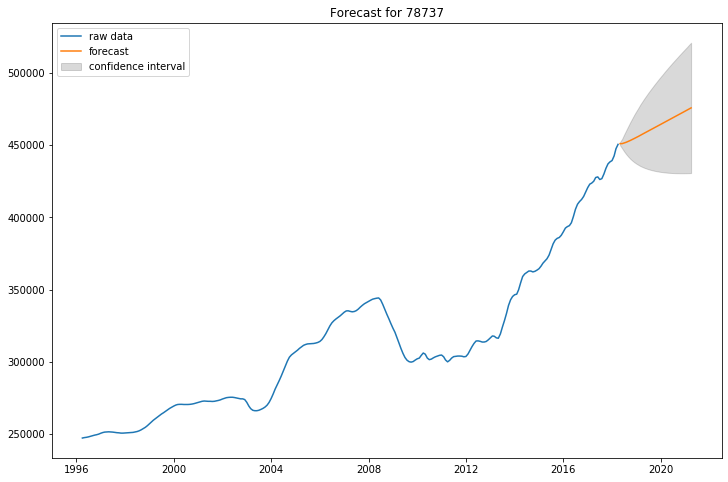

In [81]:
interpret_model(78737, 2, 1, 2)

## 78739: -2.5351% return

In [82]:
evaluate_models(melt_zip(78739).value, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=4861544722.096
ARIMA(0, 0, 1) MSE=1225088000.811
ARIMA(0, 1, 0) MSE=4520021.618
ARIMA(0, 1, 1) MSE=1402711.150
ARIMA(0, 2, 0) MSE=596810.094
ARIMA(0, 2, 1) MSE=412231.923
ARIMA(1, 0, 0) MSE=4509806.744
ARIMA(1, 1, 0) MSE=587335.631
ARIMA(1, 1, 1) MSE=399282.993
ARIMA(1, 1, 2) MSE=411930.884
ARIMA(1, 2, 0) MSE=577726.827
ARIMA(1, 2, 1) MSE=453223.272
ARIMA(1, 2, 2) MSE=409278.097
ARIMA(2, 0, 0) MSE=595066.620
ARIMA(2, 0, 1) MSE=405886.216
ARIMA(2, 1, 0) MSE=556465.857
ARIMA(2, 1, 1) MSE=443584.974
ARIMA(2, 1, 2) MSE=418780.616
ARIMA(2, 2, 0) MSE=487344.470
ARIMA(2, 2, 1) MSE=436995.437
ARIMA(2, 2, 2) MSE=417135.038
ARIMA(4, 0, 0) MSE=487502.047
ARIMA(4, 0, 1) MSE=607717.383
ARIMA(4, 1, 0) MSE=412835.617
ARIMA(4, 1, 1) MSE=420352.552
ARIMA(4, 2, 0) MSE=432912.875
ARIMA(4, 2, 1) MSE=426674.840
Best ARIMA(1, 1, 1) MSE=399282.993


 I would expect a -2.5351% return on my investment in 78739


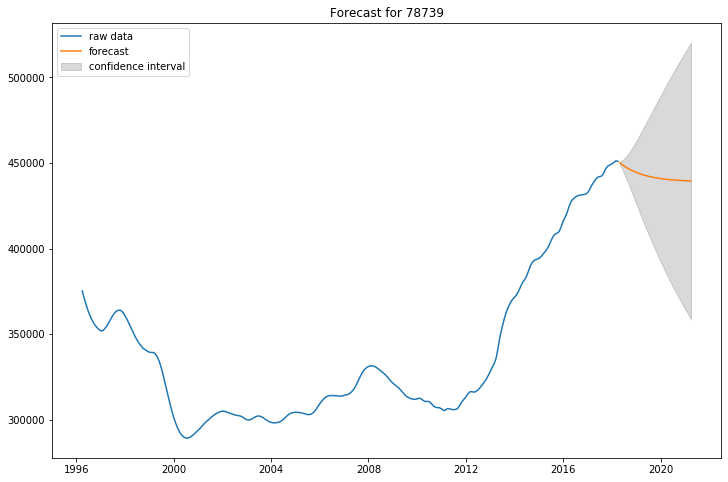

In [83]:
interpret_model(78739, 1, 1, 1)

## 78726: 5.1124% return

In [84]:
evaluate_models(melt_zip(78726).value, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=4776375256.818
ARIMA(0, 0, 1) MSE=1204854981.063
ARIMA(0, 1, 0) MSE=5748292.334
ARIMA(0, 1, 1) MSE=1778997.302
ARIMA(0, 2, 0) MSE=1223184.336
ARIMA(0, 2, 1) MSE=766303.654
ARIMA(1, 0, 0) MSE=6029334.760
ARIMA(1, 1, 0) MSE=1183001.494
ARIMA(1, 1, 1) MSE=716380.035
ARIMA(1, 1, 2) MSE=693915.772
ARIMA(1, 2, 0) MSE=1065830.923
ARIMA(1, 2, 1) MSE=780703.513
ARIMA(1, 2, 2) MSE=750483.732
ARIMA(2, 1, 0) MSE=972008.789
ARIMA(2, 1, 1) MSE=719960.323
ARIMA(2, 2, 0) MSE=738403.447
ARIMA(2, 2, 1) MSE=691463.190
ARIMA(2, 2, 2) MSE=726268.548
ARIMA(4, 0, 0) MSE=746054.865
ARIMA(4, 0, 1) MSE=690748.613
ARIMA(4, 0, 2) MSE=693660.312
ARIMA(4, 1, 0) MSE=683835.888
ARIMA(4, 1, 1) MSE=681751.635
ARIMA(4, 2, 0) MSE=709708.377
ARIMA(4, 2, 1) MSE=725544.785
Best ARIMA(4, 1, 1) MSE=681751.635


 I would expect a 5.1124% return on my investment in 78726


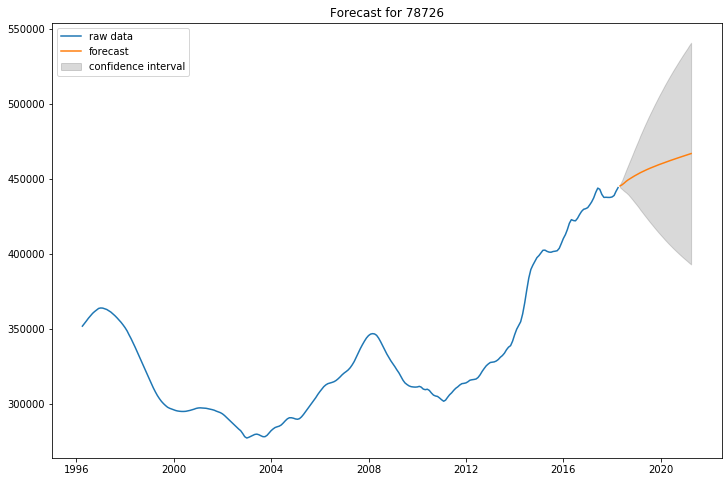

In [85]:
interpret_model(78726, 4, 1, 1)

## 78732: 8.1145% return

In [86]:
evaluate_models(melt_zip(78732).value, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=5732677877.206
ARIMA(0, 1, 0) MSE=2562093.825
ARIMA(0, 1, 1) MSE=819796.034
ARIMA(0, 2, 0) MSE=506623.202
ARIMA(0, 2, 1) MSE=366527.567
ARIMA(1, 1, 0) MSE=497144.309
ARIMA(1, 1, 1) MSE=351394.178
ARIMA(1, 1, 2) MSE=391512.957
ARIMA(1, 2, 0) MSE=527145.290
ARIMA(1, 2, 1) MSE=410592.958
ARIMA(1, 2, 2) MSE=410123.018
ARIMA(2, 0, 1) MSE=366426.859
ARIMA(2, 0, 2) MSE=402830.509
ARIMA(2, 1, 0) MSE=505010.535
ARIMA(2, 1, 1) MSE=397239.906
ARIMA(2, 1, 2) MSE=399373.797
ARIMA(2, 2, 0) MSE=439172.425
ARIMA(2, 2, 1) MSE=399528.295
ARIMA(2, 2, 2) MSE=407204.376
ARIMA(4, 0, 1) MSE=397160.034
ARIMA(4, 2, 0) MSE=395692.511
ARIMA(4, 2, 1) MSE=396249.038
Best ARIMA(1, 1, 1) MSE=351394.178


 I would expect a 8.1145% return on my investment in 78732


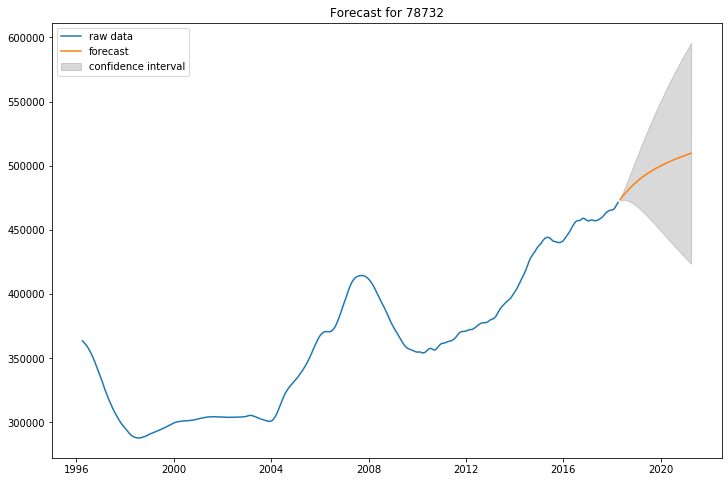

In [87]:
interpret_model(78732, 1, 1, 1)

## 78756: 9.0888% return

In [88]:
evaluate_models(melt_zip(78756).value, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=11432279195.269
ARIMA(0, 0, 1) MSE=2893778612.386
ARIMA(0, 1, 0) MSE=4204690.343
ARIMA(0, 1, 1) MSE=1732888.994
ARIMA(0, 2, 0) MSE=1140311.412
ARIMA(0, 2, 1) MSE=928475.356
ARIMA(1, 0, 0) MSE=6525941.181
ARIMA(1, 1, 0) MSE=1077007.023
ARIMA(1, 1, 2) MSE=894042.807
ARIMA(1, 2, 0) MSE=1101460.049
ARIMA(1, 2, 1) MSE=980609.088
ARIMA(1, 2, 2) MSE=894189.318
ARIMA(2, 0, 0) MSE=1126476.265
ARIMA(2, 1, 0) MSE=971844.612
ARIMA(2, 1, 1) MSE=882268.357
ARIMA(2, 1, 2) MSE=787168.494
ARIMA(2, 2, 0) MSE=946949.694
ARIMA(2, 2, 1) MSE=941444.268
ARIMA(2, 2, 2) MSE=875370.154
ARIMA(4, 0, 0) MSE=934306.274
ARIMA(4, 1, 0) MSE=876838.674
ARIMA(4, 1, 1) MSE=886071.620
ARIMA(4, 1, 2) MSE=849149.398
ARIMA(4, 2, 0) MSE=953858.392
Best ARIMA(2, 1, 2) MSE=787168.494


 I would expect a 9.0888% return on my investment in 78756


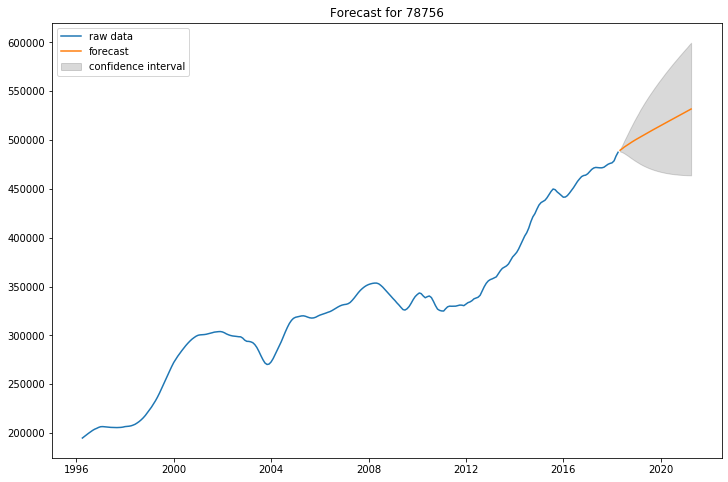

In [89]:
interpret_model(78756, 2, 1, 2)

## 78721: 6.4964% return 

In [90]:
evaluate_models(melt_zip(78721).value, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=6812425918.078
ARIMA(0, 0, 1) MSE=1733085276.041
ARIMA(0, 1, 0) MSE=4130815.151
ARIMA(0, 1, 1) MSE=1376648.030
ARIMA(0, 2, 0) MSE=983023.396
ARIMA(0, 2, 1) MSE=728051.788
ARIMA(0, 2, 2) MSE=777459.224
ARIMA(1, 0, 0) MSE=5952600.506
ARIMA(1, 1, 0) MSE=951903.739
ARIMA(1, 1, 1) MSE=671933.141
ARIMA(1, 1, 2) MSE=693772.390
ARIMA(1, 2, 0) MSE=928595.821
ARIMA(1, 2, 1) MSE=747399.196
ARIMA(2, 0, 0) MSE=972932.211
ARIMA(2, 1, 0) MSE=853512.435
ARIMA(2, 1, 1) MSE=692174.276
ARIMA(2, 1, 2) MSE=685173.398
ARIMA(2, 2, 0) MSE=662178.606
ARIMA(2, 2, 1) MSE=653992.197
ARIMA(4, 1, 0) MSE=650152.594
ARIMA(4, 1, 1) MSE=650142.055
ARIMA(4, 2, 0) MSE=650229.703
ARIMA(4, 2, 1) MSE=661807.580
Best ARIMA(4, 1, 1) MSE=650142.055


 I would expect a 6.4964% return on my investment in 78721


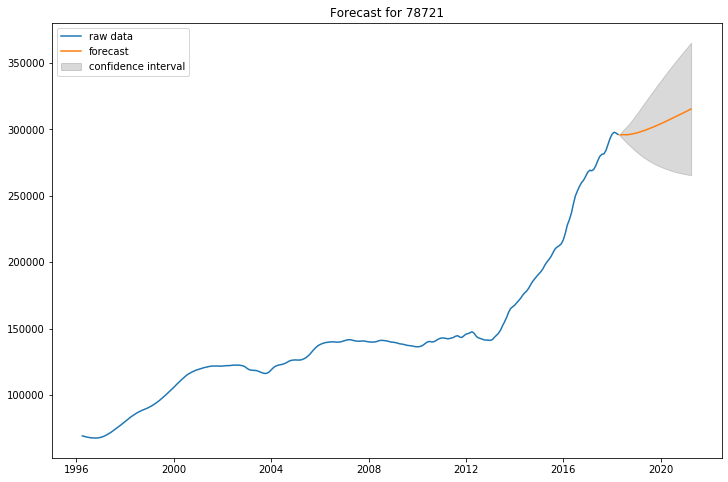

In [91]:
interpret_model(78721, 4, 1, 1)

## 78730: 4.095% return

In [92]:
evaluate_models(melt_zip(78730).value, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=9883235056.804
ARIMA(0, 0, 1) MSE=2509443572.113
ARIMA(0, 1, 0) MSE=19625704.778
ARIMA(0, 1, 1) MSE=6112651.276
ARIMA(0, 2, 0) MSE=4653950.166
ARIMA(0, 2, 1) MSE=3045632.042
ARIMA(1, 0, 0) MSE=22046854.027
ARIMA(1, 1, 0) MSE=4500758.229
ARIMA(1, 1, 2) MSE=2581188.511
ARIMA(1, 2, 0) MSE=3953623.406
ARIMA(1, 2, 1) MSE=3187420.491
ARIMA(2, 1, 0) MSE=3457081.806
ARIMA(2, 1, 1) MSE=2851210.917
ARIMA(2, 1, 2) MSE=2526748.610
ARIMA(2, 2, 0) MSE=3145198.498
ARIMA(2, 2, 1) MSE=3158683.596
ARIMA(4, 1, 1) MSE=2904275.373
ARIMA(4, 1, 2) MSE=2784283.948
ARIMA(4, 2, 0) MSE=3139444.310
ARIMA(4, 2, 1) MSE=3140939.560
Best ARIMA(2, 1, 2) MSE=2526748.610


 I would expect a 4.095% return on my investment in 78730


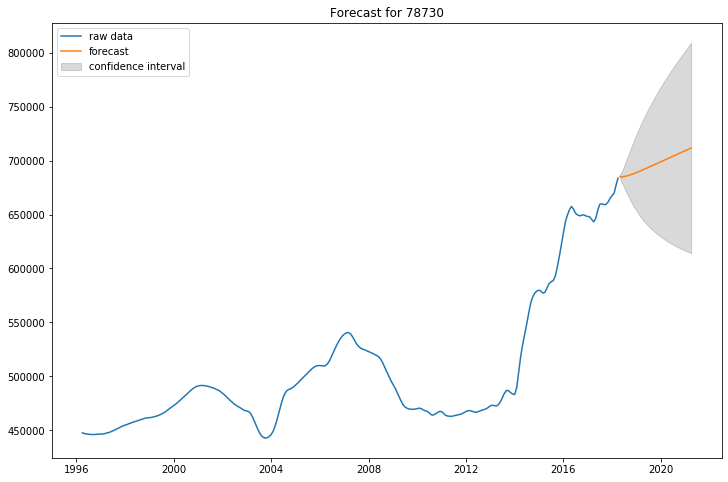

In [93]:
interpret_model(78730, 2, 1, 2)

## 78736

In [94]:
evaluate_models(melt_zip(78736).value, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=5006070361.867
ARIMA(0, 1, 0) MSE=6140140.745
ARIMA(0, 1, 1) MSE=2003631.993
ARIMA(0, 2, 0) MSE=1480810.757
ARIMA(0, 2, 1) MSE=953638.545
ARIMA(1, 1, 0) MSE=1433633.242
ARIMA(1, 1, 1) MSE=870283.074
ARIMA(1, 1, 2) MSE=741722.190
ARIMA(1, 2, 0) MSE=1309831.813
ARIMA(1, 2, 1) MSE=967562.867
ARIMA(2, 1, 0) MSE=1130005.179
ARIMA(2, 1, 1) MSE=845219.729
ARIMA(2, 1, 2) MSE=725168.457
ARIMA(2, 2, 0) MSE=902711.277
ARIMA(2, 2, 1) MSE=833028.681
ARIMA(2, 2, 2) MSE=818437.187
ARIMA(4, 1, 0) MSE=818146.191
ARIMA(4, 1, 1) MSE=810784.144
ARIMA(4, 2, 0) MSE=868053.585
ARIMA(4, 2, 1) MSE=894026.950
Best ARIMA(2, 1, 2) MSE=725168.457


 I would expect a 6.1997% return on my investment in 78736


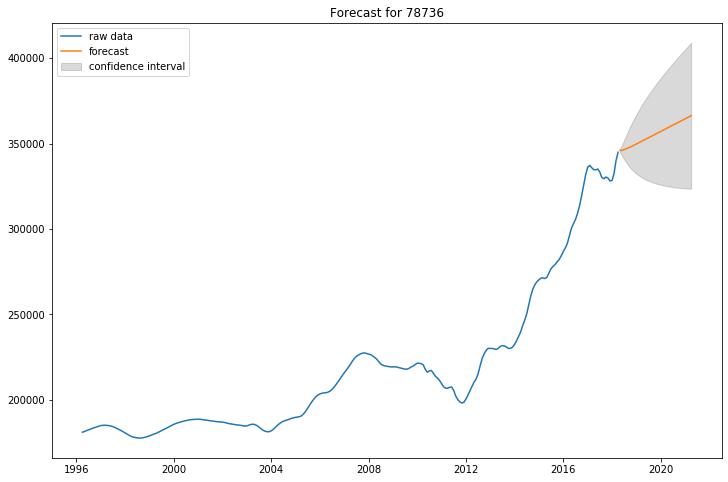

In [95]:
interpret_model(78736, 2, 1, 2)

## 78733: 42.8708% return

In [96]:
evaluate_models(melt_zip(78733).value, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=5765503125.085
ARIMA(0, 1, 0) MSE=13429419.263
ARIMA(0, 1, 1) MSE=5422115.419
ARIMA(0, 2, 0) MSE=5947412.745
ARIMA(0, 2, 1) MSE=4868905.764
ARIMA(1, 1, 0) MSE=5600089.667
ARIMA(1, 2, 0) MSE=6049082.881
ARIMA(2, 1, 0) MSE=5303105.383
ARIMA(2, 2, 0) MSE=4744052.602
ARIMA(2, 2, 1) MSE=4069567.036
ARIMA(2, 2, 2) MSE=3508438.022
ARIMA(4, 1, 0) MSE=3844077.873
ARIMA(4, 1, 1) MSE=3642377.296
ARIMA(4, 2, 0) MSE=3536062.451
ARIMA(4, 2, 1) MSE=3652828.916
Best ARIMA(2, 2, 2) MSE=3508438.022


 I would expect a 42.8708% return on my investment in 78733


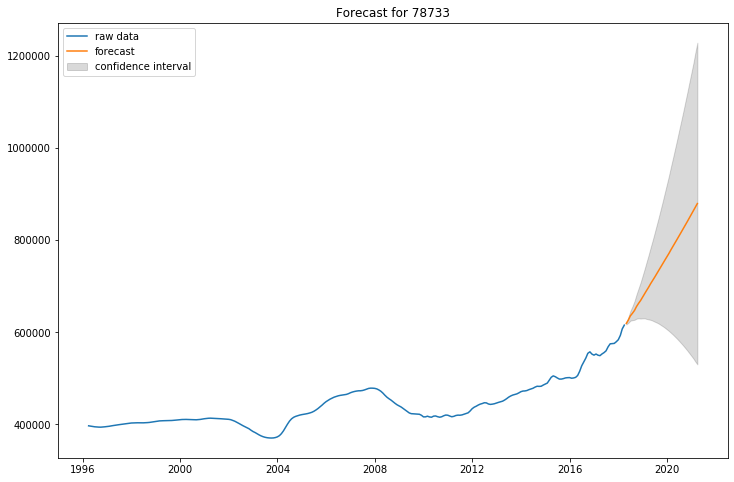

In [97]:
interpret_model(78733, 2, 2, 2)

## 78722: 4.8248% return

In [98]:
evaluate_models(melt_zip(78722).value, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=11950999775.004
ARIMA(0, 0, 1) MSE=3030704801.550
ARIMA(0, 1, 0) MSE=3657406.474
ARIMA(0, 1, 1) MSE=1224986.367
ARIMA(0, 2, 0) MSE=1329644.506
ARIMA(0, 2, 1) MSE=920276.077
ARIMA(1, 0, 0) MSE=6262233.450
ARIMA(1, 1, 0) MSE=1251610.485
ARIMA(1, 2, 0) MSE=1264658.442
ARIMA(1, 2, 1) MSE=938187.091
ARIMA(2, 0, 0) MSE=1298729.866
ARIMA(2, 0, 1) MSE=855534.556
ARIMA(2, 1, 0) MSE=1104727.500
ARIMA(2, 1, 1) MSE=827085.026
ARIMA(2, 1, 2) MSE=747504.500
ARIMA(2, 2, 0) MSE=872966.286
ARIMA(2, 2, 1) MSE=808590.051
ARIMA(2, 2, 2) MSE=815433.535
ARIMA(4, 0, 0) MSE=1219728.110
ARIMA(4, 0, 1) MSE=799856.041
ARIMA(4, 0, 2) MSE=781328.733
ARIMA(4, 1, 0) MSE=779554.936
ARIMA(4, 1, 1) MSE=769302.013
ARIMA(4, 2, 0) MSE=810636.852
ARIMA(4, 2, 1) MSE=812195.773
Best ARIMA(2, 1, 2) MSE=747504.500


 I would expect a 4.8248% return on my investment in 78733


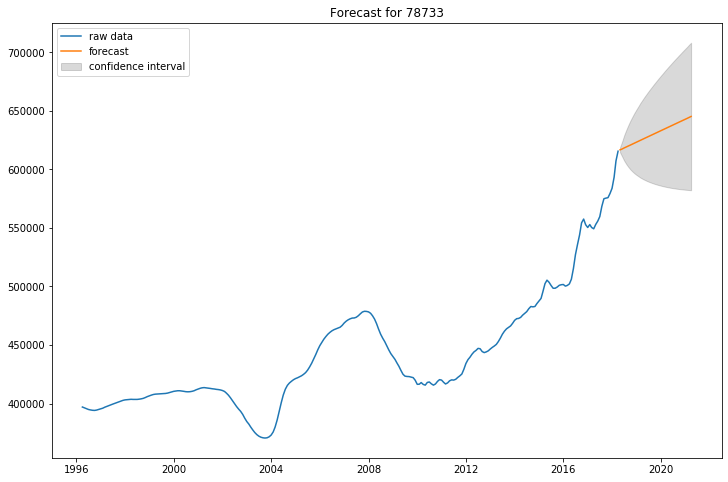

In [100]:
interpret_model(78733, 2, 1, 2)

## 78725: 18.983% return

In [101]:
evaluate_models(melt_zip(78725).value, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=934446917.773
ARIMA(0, 0, 1) MSE=238433972.347
ARIMA(0, 1, 0) MSE=1216627.755
ARIMA(0, 1, 1) MSE=412664.406
ARIMA(0, 2, 0) MSE=238154.648
ARIMA(0, 2, 1) MSE=192787.212
ARIMA(0, 2, 2) MSE=195797.776
ARIMA(1, 0, 0) MSE=1478615.299
ARIMA(1, 1, 0) MSE=230633.393
ARIMA(1, 1, 1) MSE=177368.676
ARIMA(1, 1, 2) MSE=185747.408
ARIMA(1, 2, 0) MSE=229843.381
ARIMA(1, 2, 1) MSE=195745.514
ARIMA(2, 0, 0) MSE=233180.028
ARIMA(2, 1, 0) MSE=213042.847
ARIMA(2, 1, 1) MSE=185469.949
ARIMA(2, 1, 2) MSE=185003.674
ARIMA(2, 2, 0) MSE=192728.078
ARIMA(2, 2, 1) MSE=190529.219
ARIMA(4, 0, 0) MSE=252684.342
ARIMA(4, 1, 0) MSE=187161.035
ARIMA(4, 1, 1) MSE=186637.937
ARIMA(4, 2, 0) MSE=179211.237
ARIMA(4, 2, 1) MSE=168598.303
Best ARIMA(4, 2, 1) MSE=168598.303


 I would expect a 18.983% return on my investment in 78725


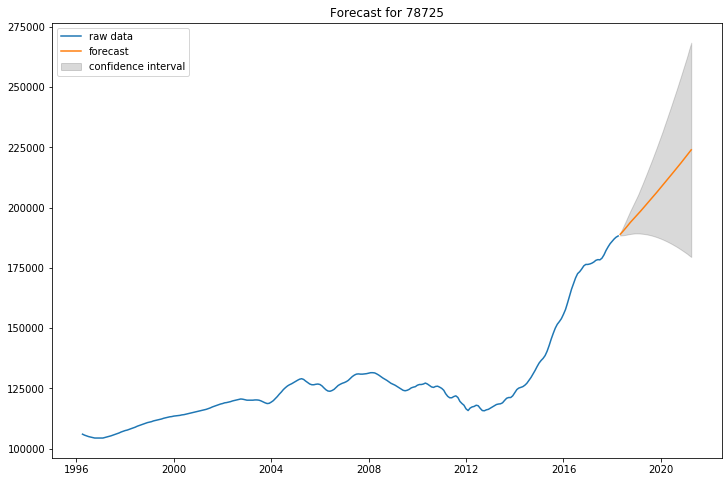

In [102]:
interpret_model(78725, 4, 2, 1)